<a href="https://colab.research.google.com/github/khalil-alexander/get_forecast/blob/main/DataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="red"> Pip install Astropy in google colab <font/>
### <font color="Green"> We install astropy in order to convert kilometre to longitatide later <font/>

In [1]:
!pip install astropy
!pip install country_converter
!pip install shapely
!pip install cartopy
!pip install geopandas
!pip install movingpandas
!pip install hvplot
!pip install holoviews
!pip install geoviews
!pip install global_land_mask
!pip install reverse_geocode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.1 MB/s eta 0:00:00


## <font color="red"> Install Moudles in google colab <font/>

In [2]:
from astropy import coordinates as coord
from astropy import units as u
from astropy import time
from astropy.time import Time
from astropy.coordinates import Angle

In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests as reqs
import xml.etree.ElementTree as ET
import io
import pprint
import json
import datetime

In [4]:
import geopandas as gpd
import movingpandas as mpd
import numpy as np
from geopy.geocoders import Nominatim

/usr/local/lib/python3.11/dist-packages/movingpandas/__init__.py:41: UserWarning: Missing optional dependencies. To use the trajectory smoother classes please install Stone Soup (see https://stonesoup.readthedocs.io/en/latest/#installation).
  warnings.warn(e.msg, UserWarning)


In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.cm as mcm

In [6]:
import cartopy
import cartopy.crs as ccrs
import country_converter as coco
from cartopy.feature.nightshade import Nightshade
from global_land_mask import globe

In [7]:
from shapely import geometry as shpgeom
from shapely import wkt as shpwkt

In [8]:
import holoviews as hv
import hvplot.pandas
import geoviews

In [9]:
import os
from pathlib import Path
import datetime as dt
from datetime import timezone

In [10]:
from datetime import datetime
import datetime as dt
from datetime import timezone

In [11]:
import xarray as xr

In [12]:
from global_land_mask import globe
import reverse_geocode

# <font color="red">Why is the International Space Station (ISS) important?<font/>

### <font color="blue">The ISS hosts research for new space technologies, microbiology, studying diseases, and physics through microgravity. The ISS is the largest statilte that orbits the earth.<font/>


# <font color="red">What is a orbit?<font/>

### <font color="blue">An orbit is when the ISS crosses the antimeridian<font/>


# <font color="red">What do we need to know?<font/>
- ## <font color="blue">Astropy <font/>
- ## <font color="blue"> Datetime <font/>
- ## <font color="blue">Pandas <font/>
- ## <font color="blue">Xarray <font/>


## <font color="red">What is Astropy? <font/>
### <font color="blue">Astropy is a Python package designed specifically for astronomy. There are tools that handle units which will be useful for us later. <font/>


## <font color="red">What is Datetime?
### <font color="blue">Datetime is a Python module that provides classes for dates and time. We use datetime to get real time data for the ISS position<font/>

## <font color="red">What is Pandas?
### <font color="blue">An open source python libary used for data manipulation and analysis <font/>

## <font color="red">What is Xarray?
### <font color="blue">An open source project and Python package that works with multi-dimensional data<font/>

## <font color="red"> Converting coordinates to Latitude and Longitude ISS</font>
### <font color="blue"> Using astropy we were able to convery kilometre to longitude and latitude. <font/>

## <font color="red"> Creating functions to clean up Latitude and Longitude ISS <font/>

### <font color="green">Create an empty dateframe for functions <font/>

### <font color="blue">Create two function that changes km to lat/lon <font/>


<font color="Burgundy"> First an empty pandas dataframe with only 7 column names were created. The pandas dataframe will help store the data in a two-dimentional data structure. This will help to store the data from web scraping later.<font/>


<font color="Burgundy"> We create a functions to convert the x units and y units to latitude and longitude that we will have in our Pandas dataframe that we previously created through astropy.<font/>

In [13]:
def create_latlon_positions(date: str, xyz: list[float]):
    now = Time(date, scale='utc')
    cartrep = coord.CartesianRepresentation(*xyz, unit=u.km)

    gcrs = coord.GCRS(cartrep, obstime = now)
    itrs = gcrs.transform_to(coord.ITRS(obstime = now))
    loc = coord.EarthLocation(*itrs.cartesian.xyz)

    return Angle(loc.lat).deg, Angle(loc.lon).deg


In [14]:
def get_latlon(row: pd.Series):
    date = row['Date'].strftime('%Y-%m-%d %H:%M:%S')
    xyz = [row['x units(km)'], row['y units(km)'], row['z units(km)']]
    return create_latlon_positions(date, xyz)




## <font color="red"> read_xml_DateFrame <font/>
### <font color="green">A function that reads an xml file and returns the specfic position the ISS is at during different time. <font/>

<font color="blue"> We pass in the url of an XML file:https://nasa-public-data.s3.amazonaws.com/iss-coords/current/ISS_OEM/ISS.OEM_J2K_EPH.xml
<font color="blue"> We use the XML file to webscrap data on the the position of the ISS and time the ISS was in that posistion.

<font color="blue"> In order to clean up the data we use Beautifulsoup

### <font color="green">What is Beautifulsoup? <font/>

<font color="blue">Beautifulsoup is a python libary that is used to pull XML and HTML files. In this case we want to pull out an XML file. <font/>

<font color="blue">The XML file we used to extract data from: https://nasa-public-data.s3.amazonaws.com/iss-coords/current/ISS_OEM/ISS.OEM_J2K_EPH.xml <font/>

In [15]:
def read_xml_DataFrame(url):
    """
    Do web scraping from an XML file to obtain time the International Space
    Station will be at a specfic postion and the speed it is going at.

    Parameters
    ----------
    url : String
        The url of the data in XML format you want to extract from.

    Return
    ------
    df : Pandas DataFrame
        The DataFrame containing the time the International Space Station is at
        a specfic position and the speed it is traveling.
    """
    # Get the xml request
    xml = reqs.get(url)

    # Use BeautifulSoup to Organize the XML file
    soup = BeautifulSoup(xml.content,"lxml")

    # Finds all the instances 'statevector' appeared in the xml file
    state_tag = soup.find_all('statevector')

    col_name = ['Date','x units(km)',
                'y units(km)','z units(km)',
                'x_dot(km/s)',
                'y_dot(km/s)','z_dot(km/s)']
    df = pd.DataFrame(columns=col_name)

    #Loops thorugh all elements to add rows in the empty xml_df
    for element in state_tag:
        # Turns element into text and splits the '\n'
        element = element.text.split('\n')
        # Deletes First empty String
        element.pop(0)
        # Deletes Last empty Sting
        element.pop(-1)
        # Removes the 'Z' in the elements first index
        element[0] = element[0][:-1]

        # Appending list into DataFrame by adding 1 row to the DataFrame
        #df = xml_df.append(pd.DataFrame(element, columns=col_name), ignore_index=True)
        df.loc[len(df)] = element


    # Turns the "Date" collumn into a Datetime object
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%jT%H:%M:%S.%f')
    # Sets the "Date" collumn into a Datetime object
    #df.set_index("Date", inplace=True)

    # Returns the Dataframe
    return df

In [16]:
xml_url = "https://nasa-public-data.s3.amazonaws.com/iss-coords/current/ISS_OEM/ISS.OEM_J2K_EPH.xml"
%time df = read_xml_DataFrame(xml_url)

<ipython-input-15-ea97148a76b9>:21: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(xml.content,"lxml")


CPU times: user 9.28 s, sys: 165 ms, total: 9.44 s
Wall time: 9.71 s


In [17]:
df

,Date,x units(km),y units(km),z units(km),x_dot(km/s),y_dot(km/s),z_dot(km/s)
0,2025-01-29 12:00:00,2443.0382499880102,-5778.2850940518101,2599.7587569216798,3.9084994776634798,4.0156315222977996,5.2291443404095599
1,2025-01-29 12:04:00,3280.6152451134699,-4615.6740623047799,3744.4059464830798,3.0286282381165699,5.61345561973123,4.25108316201971
2,2025-01-29 12:08:00,3879.1011171519399,-3116.6691983155001,4615.3883334614802,1.9283091275362301,6.8017695463885497,2.96264927686626
3,2025-01-29 12:12:00,4194.9665158328698,-1390.5911922072801,5149.1516782904,0.68786056964410003,7.4942180722443101,1.4581613312552899
4,2025-01-29 12:16:00,4205.2709586343799,436.771811458652,5306.7825153517597,-0.60251493199263995,7.6406964688970396,-0.15261966097692001
...,...,...,...,...,...,...,...
6004,2025-02-13 11:44:00,5110.2807055548601,3793.9977932900802,-2388.4318424102398,-4.6436074693890399,2.8796288554299001,-5.3649666550538102
6005,2025-02-13 11:48:00,3823.7129931100299,4338.9040484199004,-3573.3548138525498,-6.0121551714466497,1.63380759319557,-4.4491835663819899
6006,2025-02-13 11:52:00,2259.5533357967302,4568.8335085671497,-4498.1619408873603,-6.9429521091323796,0.27084872642237001,-3.2106936542545799
6007,2025-02-13 11:56:00,531.52446031121201,4467.4400324159596,-5095.8627268489199,-7.3696151065962097,-1.1104796614071899,-1.73992965884609


#### <font color="green">Adds latitude and longitude to the Data Frame <font/>

<font color="Burgundy"> We use the get_latlon function to have the dataframe return only the date, latitude, and longitude <font/>

In [18]:
%time df[['lat','lon']] = df.apply(get_latlon, axis=1, result_type='expand')

CPU times: user 50.4 s, sys: 1.22 s, total: 51.6 s
Wall time: 58 s


## <font color="red">Confrim if lat is below 50 and above -50 <font/>
### <font color="green">We do this because the International Space Station does not travel past 50 and -50 degrees latitude. <font/>

### <font color="green">verify_latitude function <font/>
- <font color="blue">Returns the min and max latitude in a tuple so the observer can see if the latitude matches the International Space Station path. <font/>

In [19]:
def check_latitude(df: pd.DataFrame):
    """
    Gives the minimum and maximum latitude of the path the ISS travels in a
    DataFrame.

    Parameters
    ----------
    df : Pandas Dataframe
        The url of the data in XML format you want to extract from.

    Return
    ------
    df : Tuple
        Returns df max and min latitude.
    """
    return df['lat'].min(), df['lat'].max()

<font color="Burgundy"> We see that the latitude goes up to 52 degrees which could happen with error from translating y units to latitude. <font/>

In [20]:
check_latitude(df)

(-51.7927420205269, 51.79319267800299)

In [21]:
df = df[['Date','lat','lon']]

In [22]:
df

,Date,lat,lon
0,2025-01-29 12:00:00,22.689882,-15.804721
1,2025-01-29 12:04:00,33.719718,-4.344956
2,2025-01-29 12:08:00,43.134274,10.461914
3,2025-01-29 12:12:00,49.671218,29.928664
4,2025-01-29 12:16:00,51.770752,53.264784
...,...,...,...
6004,2025-02-13 11:44:00,-20.573801,77.117947
6005,2025-02-13 11:48:00,-31.777604,88.102287
6006,2025-02-13 11:52:00,-41.543165,102.127109
6007,2025-02-13 11:56:00,-48.719654,120.606999


## <font color="red">Functions <font/>

#### <font color="blue"> The functions below are used to only extract the ISS position for 6 hours. We also make sure to obtain only the future dates, we have a parameter nhours the controls how many hours from the current time to start collecting data. If you do not pass in anything for nhours the defult value will be 3. <font/>

### 1. <font color="green">obtain_future_date <font/>
- <font color="blue">A function where you take the have argurements Pandas Dataframe and nhours.
The function takes the current time and adds in by nhours which the default is three. You will pass in a Pandas dataframe that will take the future values between startdate and 24 hours ahead. <font/>



In [23]:
def obtain_future_date(df: pd.DataFrame, nhours: int=96):
    """
    Collects future position of the ISS with nhours from current time and 6
    hours ahead of nhours

    Parameters
    ----------
    df : Pandas Dataframe
        Dataframe which contains a column with datetime objects.

    nhours: Int
        Number of hours you want to start collecting data from current time.

    Return
    ------
    df : Pandas DataFrame
        The DataFrame containing the time the International Space Station
        from current time + nhours to 6 hours ahead.
    """
    # String of the current time of day now
    start_date = dt.datetime.now() + dt.timedelta(hours=nhours)
    #end_date = start_date + dt.timedelta(hours=24)
    # Turns the date from a string object to a datetime object
    start_date = start_date.strftime("%m/%d/%Y %H:%M:%S")
    start_date = pd.to_datetime(start_date, format='%m/%d/%Y %H:%M:%S')

    end_date = start_date + dt.timedelta(hours=6)
    #end_date = end_date.strftime("%m/%d/%Y %H:%M:%S")
    #end_date = pd.to_datetime(start_date, format='%m/%d/%Y %H:%M:%S')
    #return (start_date, end_date)

    return df[(start_date <= df['Date']) & (end_date >= df['Date'])]

<font color="Burgundy"> We aranged the index of the Dataframe <font/>

In [24]:
df1 = obtain_future_date(df)
df1.index = range(len(df1))

In [25]:
df1

,Date,lat,lon
0,2025-02-03 18:12:00,-40.535052,63.035276
1,2025-02-03 18:16:00,-48.083592,80.965476
2,2025-02-03 18:20:00,-51.672231,103.362530
3,2025-02-03 18:24:00,-50.196745,126.837942
4,2025-02-03 18:28:00,-44.149597,146.837401
...,...,...,...
85,2025-02-03 23:52:00,45.975361,-120.198200
86,2025-02-03 23:56:00,37.463635,-103.785613
87,2025-02-04 00:00:00,26.932088,-91.274273
88,2025-02-04 00:04:00,15.319886,-81.171952


<font color="Burgundy"> Rename the column from 'Date' to 't', this will be useful later for time interpolation using an xarray.<font/>

In [26]:
df1.rename(columns={'Date': 't',}, inplace=True)

<ipython-input-26-f5fb0ce3a68a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Date': 't',}, inplace=True)


# <font color="red"> Time interpoltation<font/>

In [27]:
df1

,t,lat,lon
0,2025-02-03 18:12:00,-40.535052,63.035276
1,2025-02-03 18:16:00,-48.083592,80.965476
2,2025-02-03 18:20:00,-51.672231,103.362530
3,2025-02-03 18:24:00,-50.196745,126.837942
4,2025-02-03 18:28:00,-44.149597,146.837401
...,...,...,...
85,2025-02-03 23:52:00,45.975361,-120.198200
86,2025-02-03 23:56:00,37.463635,-103.785613
87,2025-02-04 00:00:00,26.932088,-91.274273
88,2025-02-04 00:04:00,15.319886,-81.171952


## <font color="red">Functions<font/>
###1. <font color="green"> get_orbit<font/>
#### <font color="blue">A function that creates a data frame with a full orbit. We determine a full orbit by getting the second instance where longitude switches from positive to negative.<font/>

In [28]:
def get_orbit(df: pd.DataFrame):
    count = 0
    temp_df = df['lon']

    for i in range(len(temp_df)-1):
        if (temp_df[i] > 0) and (temp_df[i+1] < 0):
            count += 1
            if count == 2:
                new_df = df.loc[low:i]
                return new_df
            low = i+1

In [29]:
df_orbit = get_orbit(df1)

<font color="Burgundy"> Set the date as the index and change the name from 'date' to 't' for time interpoltation later. <font/>

In [30]:
df_orbit.set_index('t', inplace=True)

In [31]:
df_orbit

,lat,lon
t,,
2025-02-03 18:40:00,-12.430790,-176.377673
2025-02-03 18:44:00,-0.263025,-167.609929
2025-02-03 18:48:00,11.915897,-158.858534
2025-02-03 18:52:00,23.718298,-149.204583
2025-02-03 18:56:00,34.631395,-137.522061
2025-02-03 19:00:00,43.840735,-122.367024
2025-02-03 19:04:00,50.045498,-102.510721
2025-02-03 19:08:00,51.709479,-79.046539
2025-02-03 19:12:00,48.277119,-56.489210


## <font color="red"> Function <font/>
### <font color="green"> 1. count_orbit <font/>
#### <font color="blue"> A function that counts the amount of time in the dataframe where the longitude switched from positive to negative. This is how we determine the orbits. <font/>

In [32]:
def count_orbit(df: pd.DataFrame):
    count = 0
    temp_df = df['lon']

    for i in range(len(temp_df)-1):
        if (temp_df[i] > 0) and (temp_df[i+1] < 0):
            count += 1
            print(i, temp_df[i], temp_df[i+1])
    return count

In [33]:
orbit = count_orbit(df_orbit)

<ipython-input-32-ce539bacc193>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (temp_df[i] > 0) and (temp_df[i+1] < 0):


<font color="Burgundy"> Since we got a value of zero we can confrim the dataframe df_orbit is a full orbit. We can tell because the longitude starts from a value close to -180 and ends with a value clost to 180. <font/>

<font color="Burgundy"> If we got a value of 1 or more we know we got more than a full orbit. <font/>

In [34]:
orbit

0

In [35]:
df_orbit

,lat,lon
t,,
2025-02-03 18:40:00,-12.430790,-176.377673
2025-02-03 18:44:00,-0.263025,-167.609929
2025-02-03 18:48:00,11.915897,-158.858534
2025-02-03 18:52:00,23.718298,-149.204583
2025-02-03 18:56:00,34.631395,-137.522061
2025-02-03 19:00:00,43.840735,-122.367024
2025-02-03 19:04:00,50.045498,-102.510721
2025-02-03 19:08:00,51.709479,-79.046539
2025-02-03 19:12:00,48.277119,-56.489210


## <font color="red"> Getting full orbit <font/>

## <font color="green"> xarray <font/>

In [36]:
def changeto_xarray(df):
    """
    Using a previous DataFrame and converting it into an Xarray.

    Parameters
    ----------
    df : Pandas DataFrame



    Return
    ------
    ds : Xarray
        The Xarray containing the collected following data variables:
        Date, Latitude(lat), and Longitude(lon).

    """

    #Converts the hourly  DateTime object to an Xarray object which return a more percise time with it's weather conditions
    ds = df.to_xarray()

    return ds

In [37]:
len(df_orbit)

26

In [38]:
test_ds = changeto_xarray(df_orbit)

In [39]:
test_ds

<xarray.Dataset> Size: 624B
Dimensions:  (t: 26)
Coordinates:
  * t        (t) datetime64[ns] 208B 2025-02-03T18:40:00 ... 2025-02-03T20:20:00
Data variables:
    lat      (t) float64 208B -12.43 -0.263 11.92 23.72 ... -14.99 -2.875 9.333
    lon      (t) float64 208B -176.4 -167.6 -158.9 -149.2 ... 158.1 167.0 175.6

In [40]:
df_orbit

,lat,lon
t,,
2025-02-03 18:40:00,-12.430790,-176.377673
2025-02-03 18:44:00,-0.263025,-167.609929
2025-02-03 18:48:00,11.915897,-158.858534
2025-02-03 18:52:00,23.718298,-149.204583
2025-02-03 18:56:00,34.631395,-137.522061
2025-02-03 19:00:00,43.840735,-122.367024
2025-02-03 19:04:00,50.045498,-102.510721
2025-02-03 19:08:00,51.709479,-79.046539
2025-02-03 19:12:00,48.277119,-56.489210


In [41]:
#start_date =
df_orbit.index

DatetimeIndex(['2025-02-03 18:40:00', '2025-02-03 18:44:00',
               '2025-02-03 18:48:00', '2025-02-03 18:52:00',
               '2025-02-03 18:56:00', '2025-02-03 19:00:00',
               '2025-02-03 19:04:00', '2025-02-03 19:08:00',
               '2025-02-03 19:12:00', '2025-02-03 19:16:00',
               '2025-02-03 19:20:00', '2025-02-03 19:24:00',
               '2025-02-03 19:28:00', '2025-02-03 19:32:00',
               '2025-02-03 19:36:00', '2025-02-03 19:40:00',
               '2025-02-03 19:44:00', '2025-02-03 19:48:00',
               '2025-02-03 19:52:00', '2025-02-03 19:56:00',
               '2025-02-03 20:00:00', '2025-02-03 20:04:00',
               '2025-02-03 20:08:00', '2025-02-03 20:12:00',
               '2025-02-03 20:16:00', '2025-02-03 20:20:00'],
              dtype='datetime64[ns]', name='t', freq=None)

<font color="Burgundy">We take the first index and add 5 seconds and turn that variable into start_date. We then turn the start_date object and turn it from a timestamp object to a string. <font/>

<font color="Burgundy"> We then take the last index and subtract 5 secondsand turn that variable into end_date. We then turn the end_date object and turn it from a timestamp object to a string. <font/>

In [42]:
start_date = df_orbit.index[0] + dt.timedelta(seconds=5)

In [43]:
start_date = datetime.fromtimestamp(start_date.timestamp())
start_date = start_date.strftime('%Y-%m-%dT%H:%M:%S')

In [44]:
type(start_date)

str

In [45]:
end_date = df_orbit.index[-1] - dt.timedelta(seconds=5)

In [46]:
end_date = datetime.fromtimestamp(end_date.timestamp())
end_date = end_date.strftime('%Y-%m-%dT%H:%M:%S')

In [47]:
type(end_date)

str

In [48]:
end_date

'2025-02-03T20:19:55'

In [49]:
# Create a date range for interpolation

# Start date + 5 seconds
# End date - 5 seconds

new_dates = pd.date_range(start_date, end_date, freq='20s')

In [50]:
new_dates

DatetimeIndex(['2025-02-03 18:40:05', '2025-02-03 18:40:25',
               '2025-02-03 18:40:45', '2025-02-03 18:41:05',
               '2025-02-03 18:41:25', '2025-02-03 18:41:45',
               '2025-02-03 18:42:05', '2025-02-03 18:42:25',
               '2025-02-03 18:42:45', '2025-02-03 18:43:05',
               ...
               '2025-02-03 20:16:45', '2025-02-03 20:17:05',
               '2025-02-03 20:17:25', '2025-02-03 20:17:45',
               '2025-02-03 20:18:05', '2025-02-03 20:18:25',
               '2025-02-03 20:18:45', '2025-02-03 20:19:05',
               '2025-02-03 20:19:25', '2025-02-03 20:19:45'],
              dtype='datetime64[ns]', length=300, freq='20s')

<font color="Burgundy"> We interpolate the data in test_ds with the new_dates <font/>

In [51]:
test_ds

<xarray.Dataset> Size: 624B
Dimensions:  (t: 26)
Coordinates:
  * t        (t) datetime64[ns] 208B 2025-02-03T18:40:00 ... 2025-02-03T20:20:00
Data variables:
    lat      (t) float64 208B -12.43 -0.263 11.92 23.72 ... -14.99 -2.875 9.333
    lon      (t) float64 208B -176.4 -167.6 -158.9 -149.2 ... 158.1 167.0 175.6

In [52]:
# Interpolate data to the new date range using linear interpolation

interpolated_data = test_ds.interp(t=new_dates, method='linear')



print(interpolated_data)

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T18:40:05 ... 2025-02-03T20:19:45
Data variables:
    lat      (t) float64 2kB -12.18 -11.16 -10.15 -9.135 ... 6.535 7.553 8.57
    lon      (t) float64 2kB -176.2 -175.5 -174.7 -174.0 ... 173.6 174.4 175.1


<font color="Burgundy"> Now we have data every 20 seconds in a full orbit <font/>

In [53]:
interpolated_data

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T18:40:05 ... 2025-02-03T20:19:45
Data variables:
    lat      (t) float64 2kB -12.18 -11.16 -10.15 -9.135 ... 6.535 7.553 8.57
    lon      (t) float64 2kB -176.2 -175.5 -174.7 -174.0 ... 173.6 174.4 175.1

<font color="Burgundy"> Test path of the ISS <font/>

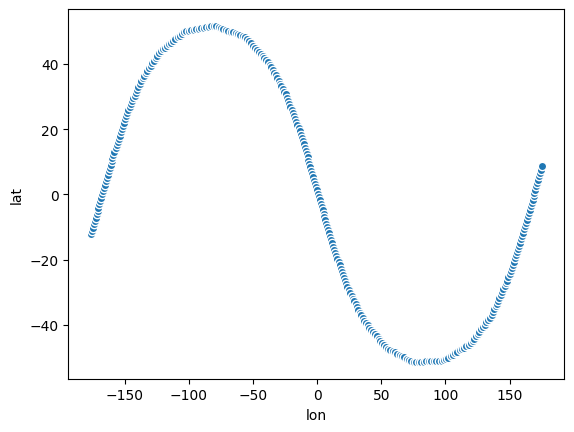

In [54]:
interpolated_data.plot.scatter(x='lon', y='lat')

<Axes: xlabel='lon', ylabel='lat'>

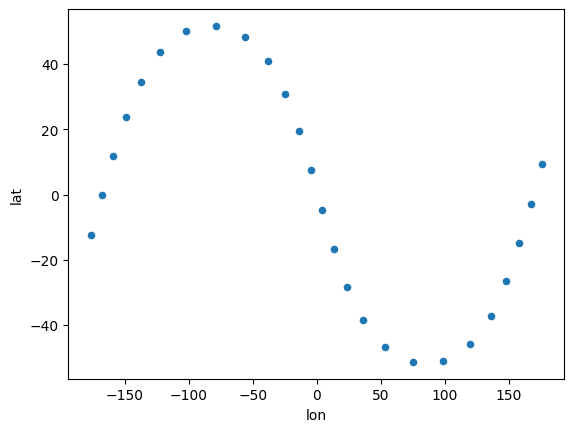

In [55]:
df_orbit.plot.scatter(x='lon', y='lat')

# ***Analysis of the ISS movement***

## <font color="red"> Read Future Locations of ISS</font>

<font color="blue">We change the interpolated data from a xarray back to a Pandas Dataframe.<font/>

<font color="blue">Pandas dataframe will be easier to manipulate for the next steps we will take.<font/>

In [56]:
df_orbit = interpolated_data.to_dataframe()

In [57]:
df_orbit

,lat,lon
t,,
2025-02-03 18:40:05,-12.177295,-176.195012
2025-02-03 18:40:25,-11.163314,-175.464366
2025-02-03 18:40:45,-10.149334,-174.733721
2025-02-03 18:41:05,-9.135354,-174.003076
2025-02-03 18:41:25,-8.121373,-173.272430
...,...,...
2025-02-03 20:18:25,4.500621,172.198591
2025-02-03 20:18:45,5.517929,172.922013
2025-02-03 20:19:05,6.535237,173.645436


### <font color="green">Its important to track if the ISS is over land or not so we use the reverse_geocode module to see if the ISS is over land.<font/>

### <font color="green"> Get land_flag with the following:<font/>
<font color="blue">create get_land_flag function the with parameters<font/>
 - <font color="blue">latitude
 - longitude<font/>

In [58]:
# Writing a function to return if there is land in a given latitude/longitude
# Function returns 1 if there is land and returns 0 if there is ocean.
def get_land_flag(row):
    """
    Extract the land_flag given the latitude/longitude information.
    This function provides if there is land in a given latitude/longitude. If
    not then we can assume the given latitude/longitude is on the ocean.

    Parameters
    ----------
    lat : float
       Latitude of the location
    lon : float
       Longitude of the location

    Returns
    -------
    land_flag : boolen
       If land_flag is true or not
    """
    # Gets checks if there is land in the given latitude/longitude
    land_flag = globe.is_land(row['lat'],row['lon'])
    # Returns land flag
    return land_flag

In [59]:
#Apply function to add land flag to the dataframe
%time df_orbit['land_flag'] = df_orbit.apply(get_land_flag, axis=1, result_type='expand')

CPU times: user 79.1 ms, sys: 0 ns, total: 79.1 ms
Wall time: 85 ms


In [60]:
df_orbit

,lat,lon,land_flag
t,,,
2025-02-03 18:40:05,-12.177295,-176.195012,False
2025-02-03 18:40:25,-11.163314,-175.464366,False
2025-02-03 18:40:45,-10.149334,-174.733721,False
2025-02-03 18:41:05,-9.135354,-174.003076,False
2025-02-03 18:41:25,-8.121373,-173.272430,False
...,...,...,...
2025-02-03 20:18:25,4.500621,172.198591,False
2025-02-03 20:18:45,5.517929,172.922013,False
2025-02-03 20:19:05,6.535237,173.645436,False


### <font color="green"> Getting the country name from latitude/longitude <font/>
- <font color="blue">First function: get_country_name <font/>

   *  <font color="blue">gets the country name <font/>

- <font color="blue">Second function: obtain_country_name <font/>
  *  <font color="blue">Uses the land_flag function and uses the first function to add to the dataframe <font/>

In [61]:
# Getting the name of a country with latitude/longitude
# Returns the name of the country
def get_country_name(lat: float, lon: float) -> str:
    """
    Extract the country name given the latitude/longitude information.
    This function provides a country name even when a location is on
    the ocean. We wish it was not the case.

    Parameters
    ----------
    lat : float
       Latitude of the location
    lon : float
       Longitude of the location

    Returns
    -------
    country : str
       Country name (empty string if no country)
    """
    # Turn latitude and longitude into a tuple
    lat_lon = (lat, lon),
    # Get location with geocode
    loc_name = reverse_geocode.search(lat_lon)
    # Returns Country name
    return loc_name[0].get('country', '')

<font color="Burgundy"> Here we test if the function get_country_name works properly and gives an accurate result <font/>

In [62]:
# Using the function get_county_name we obtain the country if land_flag is true
# Returns name of country if land_flag is true, otherwise returns 'Ocean'
def obtain_country_name(row):
    """
    Extract the country name given the latitude/longitude information.
    This function provides a country name even when a location is on
    the ocean. We wish it was not the case.

    Parameters
    ----------
    row: Pandas Dataframe
       Dataframe expected to contain the latitude and longitude

       lat : float
         Latitude of the location
       lon : float
         Longitude of the location

    Returns
    -------
    country : str
       Country name (empty string if no country)
    """
    # Checks if land_flag is true
    if row['land_flag'] == 1:
        # Gets latitude and longitude
        lat = row['lat']
        lon = row['lon']
        # Gets country name
        country = get_country_name(lat, lon)
        # Retuns country name
        return country
    else:
        # Returns ocean if land_flag is false
        return "Ocean"

In [63]:
# Apply function that adds country name into the Dataframe
%time df_orbit['Country'] = df_orbit.apply(obtain_country_name, axis=1, result_type='expand')

CPU times: user 532 ms, sys: 129 ms, total: 662 ms
Wall time: 665 ms


In [64]:
df_orbit

,lat,lon,land_flag,Country
t,,,,
2025-02-03 18:40:05,-12.177295,-176.195012,False,Ocean
2025-02-03 18:40:25,-11.163314,-175.464366,False,Ocean
2025-02-03 18:40:45,-10.149334,-174.733721,False,Ocean
2025-02-03 18:41:05,-9.135354,-174.003076,False,Ocean
2025-02-03 18:41:25,-8.121373,-173.272430,False,Ocean
...,...,...,...,...
2025-02-03 20:18:25,4.500621,172.198591,False,Ocean
2025-02-03 20:18:45,5.517929,172.922013,False,Ocean
2025-02-03 20:19:05,6.535237,173.645436,False,Ocean


In [65]:
df_orbit = df_orbit.reset_index()

In [66]:
df_orbit

,t,lat,lon,land_flag,Country
0,2025-02-03 18:40:05,-12.177295,-176.195012,False,Ocean
1,2025-02-03 18:40:25,-11.163314,-175.464366,False,Ocean
2,2025-02-03 18:40:45,-10.149334,-174.733721,False,Ocean
3,2025-02-03 18:41:05,-9.135354,-174.003076,False,Ocean
4,2025-02-03 18:41:25,-8.121373,-173.272430,False,Ocean
...,...,...,...,...,...
295,2025-02-03 20:18:25,4.500621,172.198591,False,Ocean
296,2025-02-03 20:18:45,5.517929,172.922013,False,Ocean
297,2025-02-03 20:19:05,6.535237,173.645436,False,Ocean
298,2025-02-03 20:19:25,7.552545,174.368858,False,Ocean


In [67]:
def count_orbit(df: pd.DataFrame):
    count = 0
    temp_df = df['lon']

    for i in range(len(temp_df)-1):
        if (temp_df[i] > 0) and (temp_df[i+1] < 0):
            count += 1
    return count

In [68]:
xml_orbit = count_orbit(df)

<font color="brugendy"> Now we know the XML data has 217 orbits in total. However this includes the past and future<font/>

In [69]:
df

,Date,lat,lon
0,2025-01-29 12:00:00,22.689882,-15.804721
1,2025-01-29 12:04:00,33.719718,-4.344956
2,2025-01-29 12:08:00,43.134274,10.461914
3,2025-01-29 12:12:00,49.671218,29.928664
4,2025-01-29 12:16:00,51.770752,53.264784
...,...,...,...
6004,2025-02-13 11:44:00,-20.573801,77.117947
6005,2025-02-13 11:48:00,-31.777604,88.102287
6006,2025-02-13 11:52:00,-41.543165,102.127109
6007,2025-02-13 11:56:00,-48.719654,120.606999


In [70]:
xml_orbit

217

## <font color="red"> Function <font/>
### <font color="green"> 1. count_countrys <font/>
#### <font color="blue"> A function that counts the amount of countrys the ISS flys over. <font/>

In [71]:
my_dict = {"name": "Alice", "age": 30}

# Update the value of the "age" key
my_dict["age"] = 31

my_dict['age']

31

In [72]:
def count_countrys(df: pd.DataFrame):
    country_dict = {}
    previous_name = ""
    country_count = 0
    for name, land_flag in zip(df['Country'], df['land_flag']):
        if (previous_name != name) and (name not in country_dict) and land_flag == True:
            if name not in country_dict:
                country_dict[name] = 1
                country_count += 1

        previous_name = name
    print(country_dict)
    print(country_count)
    return country_count


In [73]:
def get_countrys(df: pd.DataFrame):
    country_dict = {}
    previous_name = ""
    country_count = 0
    for name, land_flag in zip(df['Country'], df['land_flag']):
        if (previous_name != name) and (name not in country_dict) and land_flag == True:
            if name not in country_dict:
                country_dict[name] = 1
                country_count += 1

        previous_name = name
    return country_dict

In [74]:
def get_overpassed_countries(df: pd.DataFrame, country_dict: dict):
    list_countries = df["Country"].unique().tolist()
    list_countries.remove("Ocean")

    for country in list_countries:
        if country in country_dict:
            country_dict[country] += 1
        else:
            country_dict[country] = 1
    return country_dict


In [75]:
country_dict = dict()

In [76]:
country_dict = get_overpassed_countries(df_orbit, country_dict)

In [77]:
country_dict

{'United States': 1,
 'Canada': 1,
 'Morocco': 1,
 'Mauritania': 1,
 'Mali': 1,
 "Cote d'Ivoire": 1,
 'Angola': 1,
 'Namibia': 1,
 'South Africa': 1,
 'Botswana': 1,
 'Australia': 1}

In [78]:
a = count_countrys(df_orbit)
a

{'United States': 1, 'Canada': 1, 'Morocco': 1, 'Mauritania': 1, 'Mali': 1, "Cote d'Ivoire": 1, 'Angola': 1, 'Namibia': 1, 'South Africa': 1, 'Botswana': 1, 'Australia': 1}
11


11

In [79]:
b = get_countrys(df_orbit)
b

{'United States': 1,
 'Canada': 1,
 'Morocco': 1,
 'Mauritania': 1,
 'Mali': 1,
 "Cote d'Ivoire": 1,
 'Angola': 1,
 'Namibia': 1,
 'South Africa': 1,
 'Botswana': 1,
 'Australia': 1}

# <font color="red">  Check amount of time an orbit takes <font/>
#### <font color="blue"> The ISS fully orbits around the earth in 90 minutes. We will check how long a full orbit takes with our data.<font/>

In [80]:
def orbits_bytime(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d %H:%M:%S")
    end_date = datetime.strptime(end_date, "%Y-%m-%d %H:%M:%S")
    delta = end_date - start_date
    return delta//dt.timedelta(minutes=90)

In [81]:
orbits_bytime("2025-01-28 13:00:00", "2025-01-31 05:00:00")

42

## Count number of full orbits and number of parital orbits

In [82]:
def count_orbits(df: pd.DataFrame):
    count = 0
    temp_df = df['lon']
    second_turn = 0
    for i in range(len(temp_df)-1):
        if (temp_df[i] > 0) and (temp_df[i+1] < 0):
            second_turn = i+1
            count += 1
    if temp_df[second_turn+1]<0:
        count += 1
        print("Partial orbit")
    else:
        print("Full orbit")

    return count



## List of orbits

- Given a range of rows how to create a new dataframe within those specfic rows
- How to add the new dataframe to an existing list
- Make sure at the end the number of items in the list equals to the number of orbits

## Manipulate individual orbits
- For each orbit in the list do data interpolation
- Determine the country of each latitude and longitude point

## Countries overpass
- Initialize country_dicts to empty
- Loop over all the different orbits to update country_dict

In [83]:
def create_list_orbits(df: pd.DataFrame) -> list:
    """

    """
    list_orbits = list()
    temp_df = df['lon']
    first_index = 0
    second_index = 0


    for i in range(len(temp_df)-1):
        if (temp_df[i] > 0) and (temp_df[i+1] < 0):
            second_index = i+1
            list_orbits.append(df[first_index:second_index])
            first_index = second_index

    list_orbits.append(df[second_index:])


    return list_orbits

In [84]:
orbit_list = create_list_orbits(df)

In [85]:
len(orbit_list)

218

In [86]:
df

,Date,lat,lon
0,2025-01-29 12:00:00,22.689882,-15.804721
1,2025-01-29 12:04:00,33.719718,-4.344956
2,2025-01-29 12:08:00,43.134274,10.461914
3,2025-01-29 12:12:00,49.671218,29.928664
4,2025-01-29 12:16:00,51.770752,53.264784
...,...,...,...
6004,2025-02-13 11:44:00,-20.573801,77.117947
6005,2025-02-13 11:48:00,-31.777604,88.102287
6006,2025-02-13 11:52:00,-41.543165,102.127109
6007,2025-02-13 11:56:00,-48.719654,120.606999


In [87]:
orbit_list[0]

,Date,lat,lon
0,2025-01-29 12:00:00,22.689882,-15.804721
1,2025-01-29 12:04:00,33.719718,-4.344956
2,2025-01-29 12:08:00,43.134274,10.461914
3,2025-01-29 12:12:00,49.671218,29.928664
4,2025-01-29 12:16:00,51.770752,53.264784
5,2025-01-29 12:20:00,48.737170,76.120928
6,2025-01-29 12:24:00,41.538133,94.673390
7,2025-01-29 12:28:00,31.735613,108.737029
8,2025-01-29 12:32:00,20.494529,119.741188
9,2025-01-29 12:36:00,8.528484,129.055419


In [90]:
count_orbits(df)

218

In [91]:
xml_orbit

217

In [92]:
df[0:15]

,Date,lat,lon
0,2025-01-29 12:00:00,22.689882,-15.804721
1,2025-01-29 12:04:00,33.719718,-4.344956
2,2025-01-29 12:08:00,43.134274,10.461914
3,2025-01-29 12:12:00,49.671218,29.928664
4,2025-01-29 12:16:00,51.770752,53.264784
5,2025-01-29 12:20:00,48.737170,76.120928
6,2025-01-29 12:24:00,41.538133,94.673390
7,2025-01-29 12:28:00,31.735613,108.737029
8,2025-01-29 12:32:00,20.494529,119.741188
9,2025-01-29 12:36:00,8.528484,129.055419


In [93]:
df['Date']

,Date
0,2025-01-29 12:00:00
1,2025-01-29 12:04:00
2,2025-01-29 12:08:00
3,2025-01-29 12:12:00
4,2025-01-29 12:16:00
...,...
6004,2025-02-13 11:44:00
6005,2025-02-13 11:48:00
6006,2025-02-13 11:52:00
6007,2025-02-13 11:56:00


In [94]:
orbit_list[0]

,Date,lat,lon
0,2025-01-29 12:00:00,22.689882,-15.804721
1,2025-01-29 12:04:00,33.719718,-4.344956
2,2025-01-29 12:08:00,43.134274,10.461914
3,2025-01-29 12:12:00,49.671218,29.928664
4,2025-01-29 12:16:00,51.770752,53.264784
5,2025-01-29 12:20:00,48.737170,76.120928
6,2025-01-29 12:24:00,41.538133,94.673390
7,2025-01-29 12:28:00,31.735613,108.737029
8,2025-01-29 12:32:00,20.494529,119.741188
9,2025-01-29 12:36:00,8.528484,129.055419


In [95]:
 mydf = orbit_list[0].copy()

In [96]:
def get_interpolated_data(df: pd.DataFrame):
    """

    """

    df.rename(columns={'Date': 't'}, inplace=True)

    df.set_index('t', inplace=True)
    ds = df.to_xarray()

    start_date = df.index[0] + dt.timedelta(seconds=5)
    start_date = datetime.fromtimestamp(start_date.timestamp())
    start_date = start_date.strftime('%Y-%m-%dT%H:%M:%S')

    end_date = df.index[-1] - dt.timedelta(seconds=5)
    end_date = datetime.fromtimestamp(end_date.timestamp())
    end_date = end_date.strftime('%Y-%m-%dT%H:%M:%S')

    new_dates = pd.date_range(start_date, end_date, freq='20s')

    interpolated_data = ds.interp(t=new_dates, method='linear')

    df = interpolated_data.to_dataframe()
    return df

In [97]:
test_df = get_interpolated_data(mydf)

<xarray.Dataset> Size: 4kB
Dimensions:  (t: 156)
Coordinates:
  * t        (t) datetime64[ns] 1kB 2025-01-29T12:00:05 ... 2025-01-29T12:51:45
Data variables:
    lat      (t) float64 1kB 22.92 23.84 24.76 25.68 ... -35.44 -36.31 -37.19
    lon      (t) float64 1kB -15.57 -14.61 -13.66 -12.7 ... 166.6 167.6 168.7


In [98]:
test_df

,lat,lon
t,,
2025-01-29 12:00:05,22.919670,-15.565976
2025-01-29 12:00:25,23.838823,-14.610996
2025-01-29 12:00:45,24.757976,-13.656015
2025-01-29 12:01:05,25.677129,-12.701035
2025-01-29 12:01:25,26.596282,-11.746055
...,...,...
2025-01-29 12:50:25,-33.699535,164.465301
2025-01-29 12:50:45,-34.571247,165.516939
2025-01-29 12:51:05,-35.442959,166.568576


In [99]:
#for element in orbit_list:
#      print("before interpolated")
#      print(type(element))
#      #print(element)
#      element = get_interpolated_data(element)
#      print("past interpolated")
#      print(element)
#      element['land_flag'] = element.apply(get_land_flag, axis=1, result_type='expand')
#      element['Country'] = element.apply(obtain_country_name, axis=1, result_type='expand')
#      print(element)
#      break

In [100]:
orbit_list[0]

,Date,lat,lon
0,2025-01-29 12:00:00,22.689882,-15.804721
1,2025-01-29 12:04:00,33.719718,-4.344956
2,2025-01-29 12:08:00,43.134274,10.461914
3,2025-01-29 12:12:00,49.671218,29.928664
4,2025-01-29 12:16:00,51.770752,53.264784
5,2025-01-29 12:20:00,48.737170,76.120928
6,2025-01-29 12:24:00,41.538133,94.673390
7,2025-01-29 12:28:00,31.735613,108.737029
8,2025-01-29 12:32:00,20.494529,119.741188
9,2025-01-29 12:36:00,8.528484,129.055419


In [101]:
def interpolate_orbits(df_list: list) -> list:
    count = 0
    new_df_list = list()
    for element in df_list:
        element = get_interpolated_data(element)
        element['land_flag'] = element.apply(get_land_flag, axis=1, result_type='expand')
        element['Country'] = element.apply(obtain_country_name, axis=1, result_type='expand')
        new_df_list.append(element)
        count += 1
        print(count)
    return new_df_list



In [102]:
%time test_list = interpolate_orbits(orbit_list)

<xarray.Dataset> Size: 4kB
Dimensions:  (t: 156)
Coordinates:
  * t        (t) datetime64[ns] 1kB 2025-01-29T12:00:05 ... 2025-01-29T12:51:45
Data variables:
    lat      (t) float64 1kB 22.92 23.84 24.76 25.68 ... -35.44 -36.31 -37.19
    lon      (t) float64 1kB -15.57 -14.61 -13.66 -12.7 ... 166.6 167.6 168.7
1
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-29T12:56:05 ... 2025-01-29T14:31:45
Data variables:
    lat      (t) float64 2kB -46.34 -46.75 -47.15 ... -49.19 -49.67 -50.15
    lon      (t) float64 2kB -173.5 -171.8 -170.0 -168.2 ... 174.5 176.2 177.9


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


2
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-29T14:36:05 ... 2025-01-29T16:07:45
Data variables:
    lat      (t) float64 2kB -51.48 -51.15 -50.82 ... -51.29 -51.46 -51.64
    lon      (t) float64 2kB -156.8 -155.0 -153.2 -151.3 ... 169.0 171.0 172.9
3
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-29T16:12:05 ... 2025-01-29T17:43:45
Data variables:
    lat      (t) float64 2kB -48.59 -48.0 -47.4 -46.8 ... -50.2 -50.03 -49.86
    lon      (t) float64 2kB -162.5 -161.0 -159.4 -157.9 ... 163.9 165.9 167.8
4
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-29T17:48:05 ... 2025-01-29T19:23:45
Data variables:
    lat      (t) float64 2kB -43.08 -42.3 -41.52 -40.74 ... -38.0 -37.26 -36.52
    lon      (t) float64 2kB -171.0 -169.7 -168.5 -167.3 ... 173.7 175.0 176.3


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


5
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-29T19:28:05 ... 2025-01-29T21:03:45
Data variables:
    lat      (t) float64 2kB -24.99 -24.02 -23.04 -22.06 ... -18.57 -17.6 -16.64
    lon      (t) float64 2kB -170.4 -169.6 -168.8 -168.0 ... 171.4 172.3 173.1
6
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-29T21:08:05 ... 2025-01-29T22:47:45
Data variables:
    lat      (t) float64 2kB -3.568 -2.55 -1.532 -0.5141 ... 15.25 16.25 17.26
    lon      (t) float64 2kB -177.1 -176.4 -175.7 -175.0 ... 173.0 173.8 174.6


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


7
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-29T22:52:05 ... 2025-01-30T00:27:45
Data variables:
    lat      (t) float64 2kB 29.66 30.5 31.35 32.2 ... 34.45 35.33 36.2 37.08
    lon      (t) float64 2kB -174.1 -173.0 -171.8 -170.7 ... 169.5 170.6 171.6
8
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T00:32:05 ... 2025-01-30T02:03:45
Data variables:
    lat      (t) float64 2kB 46.28 46.69 47.1 47.52 ... 41.92 42.66 43.41 44.16
    lon      (t) float64 2kB -170.6 -168.8 -167.0 -165.2 ... 158.1 159.4 160.7


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


9
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T02:08:05 ... 2025-01-30T03:43:45
Data variables:
    lat      (t) float64 2kB 50.51 50.6 50.69 50.78 ... 51.11 51.29 51.46 51.64
    lon      (t) float64 2kB -177.4 -175.4 -173.4 -171.5 ... 172.1 174.0 176.0
10
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T03:48:05 ... 2025-01-30T05:19:45
Data variables:
    lat      (t) float64 2kB 48.58 47.98 47.38 46.78 ... 50.36 50.19 50.02 49.85
    lon      (t) float64 2kB -159.3 -157.8 -156.2 -154.7 ... 167.1 169.0 170.9


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


11
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T05:24:05 ... 2025-01-30T06:55:45
Data variables:
    lat      (t) float64 2kB 43.03 42.25 41.47 40.69 ... 46.6 46.12 45.65 45.17
    lon      (t) float64 2kB -167.8 -166.5 -165.3 -164.0 ... 160.2 161.9 163.6
12
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T07:00:05 ... 2025-01-30T08:39:45
Data variables:
    lat      (t) float64 2kB 35.66 34.76 33.86 32.96 ... 19.39 18.42 17.45 16.49
    lon      (t) float64 2kB -179.2 -178.2 -177.2 -176.2 ... 174.7 175.5 176.4


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


13
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T08:44:05 ... 2025-01-30T10:23:45
Data variables:
    lat      (t) float64 2kB 3.39 2.371 1.353 0.3343 ... -15.43 -16.43 -17.43
    lon      (t) float64 2kB -173.8 -173.1 -172.4 -171.7 ... 176.3 177.1 177.8
14
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T10:28:05 ... 2025-01-30T12:03:45
Data variables:
    lat      (t) float64 2kB -29.8 -30.65 -31.49 -32.34 ... -35.45 -36.33 -37.2
    lon      (t) float64 2kB -170.8 -169.6 -168.5 -167.4 ... 172.8 173.9 174.9


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


15
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T12:08:05 ... 2025-01-30T13:39:45
Data variables:
    lat      (t) float64 2kB -46.35 -46.75 -47.16 -47.57 ... -42.76 -43.5 -44.24
    lon      (t) float64 2kB -167.3 -165.5 -163.7 -161.9 ... 161.4 162.7 164.1
16
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T13:44:05 ... 2025-01-30T15:15:45
Data variables:
    lat      (t) float64 2kB -50.54 -50.62 -50.71 -50.8 ... -48.22 -48.76 -49.3
    lon      (t) float64 2kB -174.1 -172.1 -170.2 -168.2 ... 152.9 154.6 156.2


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


17
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T15:20:05 ... 2025-01-30T16:55:45
Data variables:
    lat      (t) float64 2kB -51.7 -51.45 -51.2 -50.94 ... -50.19 -50.01 -49.84
    lon      (t) float64 2kB -178.9 -177.0 -175.1 -173.2 ... 170.2 172.2 174.1
18
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T17:00:05 ... 2025-01-30T18:31:45
Data variables:
    lat      (t) float64 2kB -43.05 -42.27 -41.49 ... -46.13 -45.65 -45.17
    lon      (t) float64 2kB -164.7 -163.4 -162.2 -161.0 ... 163.3 165.0 166.7


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


19
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T18:36:05 ... 2025-01-30T20:11:45
Data variables:
    lat      (t) float64 2kB -35.7 -34.81 -33.91 -33.02 ... -29.83 -28.96 -28.09
    lon      (t) float64 2kB -176.1 -175.1 -174.1 -173.1 ... 167.0 168.0 169.1
20
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T20:16:05 ... 2025-01-30T21:55:45
Data variables:
    lat      (t) float64 2kB -15.62 -14.61 -13.6 -12.59 ... 3.22 4.238 5.257
    lon      (t) float64 2kB -179.8 -179.0 -178.3 -177.5 ... 170.4 171.1 171.8


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


21
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T22:00:05 ... 2025-01-30T23:39:45
Data variables:
    lat      (t) float64 2kB 18.3 19.26 20.21 21.16 ... 34.51 35.38 36.26 37.13
    lon      (t) float64 2kB -178.3 -177.5 -176.6 -175.7 ... 175.9 176.9 178.0
22
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-30T23:44:05 ... 2025-01-31T01:15:45
Data variables:
    lat      (t) float64 2kB 46.32 46.73 47.14 47.55 ... 41.97 42.71 43.46 44.2
    lon      (t) float64 2kB -164.2 -162.4 -160.7 -158.9 ... 164.5 165.8 167.1
23


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T01:20:05 ... 2025-01-31T02:51:45
Data variables:
    lat      (t) float64 2kB 50.53 50.62 50.71 50.79 ... 47.66 48.21 48.75 49.29
    lon      (t) float64 2kB -171.0 -169.0 -167.0 -165.1 ... 156.0 157.7 159.3


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


24
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T02:56:05 ... 2025-01-31T04:31:45
Data variables:
    lat      (t) float64 2kB 51.7 51.45 51.19 50.93 ... 50.34 50.17 49.99 49.82
    lon      (t) float64 2kB -175.7 -173.8 -171.9 -170.0 ... 173.5 175.4 177.4
25
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T04:36:05 ... 2025-01-31T06:07:45
Data variables:
    lat      (t) float64 2kB 42.98 42.19 41.41 40.62 ... 46.55 46.07 45.59 45.11
    lon      (t) float64 2kB -161.4 -160.1 -158.9 -157.7 ... 166.6 168.3 170.0
26
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T06:12:05 ... 2025-01-31T07:47:45
Data variables:
    lat      (t) float64 2kB 35.58 34.68 33.78 32.89 ... 30.55 29.68 28.8 27.93
    lon      (t) float64 2kB -172.8 -171.8 -170.8 -169.8 ... 170.3 171.3 172.4


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


27
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T07:52:05 ... 2025-01-31T09:31:45
Data variables:
    lat      (t) float64 2kB 15.41 14.4 13.39 12.38 ... -3.447 -4.467 -5.486
    lon      (t) float64 2kB -176.5 -175.7 -175.0 -174.2 ... 173.7 174.4 175.1
28
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T09:36:05 ... 2025-01-31T11:11:45
Data variables:
    lat      (t) float64 2kB -18.52 -19.47 -20.42 ... -24.84 -25.81 -26.77
    lon      (t) float64 2kB -175.0 -174.1 -173.3 -172.4 ... 167.1 168.0 168.8


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


29
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T11:16:05 ... 2025-01-31T12:51:45
Data variables:
    lat      (t) float64 2kB -38.11 -38.81 -39.51 -40.2 ... -42.83 -43.57 -44.31
    lon      (t) float64 2kB -177.5 -176.1 -174.8 -173.4 ... 167.9 169.2 170.5
30
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T12:56:05 ... 2025-01-31T14:27:45
Data variables:
    lat      (t) float64 2kB -50.57 -50.65 -50.73 ... -48.27 -48.81 -49.35
    lon      (t) float64 2kB -167.6 -165.6 -163.7 -161.7 ... 159.4 161.0 162.7


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


31
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T14:32:05 ... 2025-01-31T16:03:45
Data variables:
    lat      (t) float64 2kB -51.69 -51.44 -51.18 ... -51.08 -51.33 -51.58
    lon      (t) float64 2kB -172.4 -170.5 -168.6 -166.7 ... 153.6 155.5 157.4
32
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T16:08:05 ... 2025-01-31T17:43:45
Data variables:
    lat      (t) float64 2kB -49.53 -48.99 -48.45 ... -46.05 -45.57 -45.09
    lon      (t) float64 2kB -177.5 -175.9 -174.3 -172.7 ... 169.8 171.4 173.1
33
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T17:48:05 ... 2025-01-31T19:23:45
Data variables:
    lat      (t) float64 2kB -35.59 -34.69 -33.8 -32.9 ... -29.7 -28.83 -27.96
    lon      (t) float64 2kB -169.7 -168.7 -167.7 -166.7 ... 173.4 174.4 175.5


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


34
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T19:28:05 ... 2025-01-31T21:07:45
Data variables:
    lat      (t) float64 2kB -15.48 -14.47 -13.46 -12.45 ... 3.367 4.386 5.404
    lon      (t) float64 2kB -173.4 -172.6 -171.9 -171.2 ... 176.7 177.4 178.2
35
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T21:12:05 ... 2025-01-31T22:47:45
Data variables:
    lat      (t) float64 2kB 18.45 19.4 20.35 21.3 ... 23.81 24.78 25.74 26.71
    lon      (t) float64 2kB -172.0 -171.1 -170.2 -169.3 ... 170.2 171.0 171.9
36
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-01-31T22:52:05 ... 2025-02-01T00:27:45
Data variables:
    lat      (t) float64 2kB 38.08 38.78 39.48 40.18 ... 42.08 42.82 43.56 44.31
    lon      (t) float64 2kB -174.5 -173.1 -171.7 -170.3 ... 171.0 172.3 173.6


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


37
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T00:32:05 ... 2025-02-01T02:03:45
Data variables:
    lat      (t) float64 2kB 50.58 50.66 50.74 50.82 ... 47.74 48.28 48.82 49.36
    lon      (t) float64 2kB -164.4 -162.5 -160.5 -158.5 ... 162.6 164.2 165.8
38
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T02:08:05 ... 2025-02-01T03:39:45
Data variables:
    lat      (t) float64 2kB 51.69 51.43 51.17 50.91 ... 50.84 51.09 51.33 51.58
    lon      (t) float64 2kB -169.1 -167.2 -165.3 -163.4 ... 156.8 158.7 160.6
39
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T03:44:05 ... 2025-02-01T05:19:45
Data variables:
    lat      (t) float64 2kB 49.49 48.94 48.39 47.85 ... 46.46 45.97 45.49 45.01
    lon      (t) float64 2kB -174.2 -172.6 -171.0 -169.3 ... 173.1 174.8 176.5
40


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T05:24:05 ... 2025-02-01T06:59:45
Data variables:
    lat      (t) float64 2kB 35.43 34.53 33.63 32.73 ... 30.39 29.52 28.64 27.76
    lon      (t) float64 2kB -166.4 -165.4 -164.4 -163.4 ... 176.7 177.8 178.8
41
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T07:04:05 ... 2025-02-01T08:39:45
Data variables:
    lat      (t) float64 2kB 15.24 14.22 13.21 12.2 ... 9.562 8.557 7.552 6.547
    lon      (t) float64 2kB -170.0 -169.3 -168.6 -167.8 ... 171.3 172.1 172.8
42
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 295)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T08:44:05 ... 2025-02-01T10:22:05
Data variables:
    lat      (t) float64 2kB -6.689 -7.691 -8.693 ... -20.05 -21.04 -22.03
    lon      (t) float64 2kB -177.8 -177.0 -176.2 -175.5 ... 169.1 169.9 170.7


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


43
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T10:26:25 ... 2025-02-01T12:02:05
Data variables:
    lat      (t) float64 2kB -33.97 -34.75 -35.53 ... -39.07 -39.89 -40.71
    lon      (t) float64 2kB -177.0 -175.8 -174.5 -173.3 ... 167.2 168.3 169.5
44
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T12:06:25 ... 2025-02-01T13:38:05
Data variables:
    lat      (t) float64 2kB -48.66 -48.92 -49.18 -49.45 ... -45.5 -46.16 -46.82
    lon      (t) float64 2kB -170.8 -168.9 -167.0 -165.1 ... 156.8 158.2 159.7
45
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T13:42:25 ... 2025-02-01T15:18:05
Data variables:
    lat      (t) float64 2kB -51.48 -51.41 -51.34 -51.27 ... -51.2 -51.22 -51.24
    lon      (t) float64 2kB -176.8 -174.8 -172.9 -170.9 ... 172.3 174.3 176.3
46
<xarray.Dataset> Size: 7kB
Dimensions:  

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

48
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T18:38:25 ... 2025-02-01T20:14:05
Data variables:
    lat      (t) float64 2kB -21.32 -20.33 -19.33 -18.34 ... -14.96 -13.98 -13.0
    lon      (t) float64 2kB -172.0 -171.2 -170.4 -169.7 ... 169.5 170.3 171.1
49
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T20:18:25 ... 2025-02-01T21:58:05
Data variables:
    lat      (t) float64 2kB 0.1617 1.176 2.191 3.205 ... 18.67 19.66 20.65
    lon      (t) float64 2kB -179.4 -178.7 -177.9 -177.2 ... 170.9 171.7 172.5
50
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-01T22:02:25 ... 2025-02-01T23:38:05
Data variables:
    lat      (t) float64 2kB 32.75 33.55 34.35 35.15 ... 37.15 37.98 38.82 39.66
    lon      (t) float64 2kB -175.5 -174.3 -173.1 -171.9 ... 168.4 169.6 170.7
51
<xarray.Dataset> Size: 7kB
Dimensions: 

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni


52
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T01:18:25 ... 2025-02-02T02:54:05
Data variables:
    lat      (t) float64 2kB 51.26 51.23 51.21 51.19 ... 51.22 51.29 51.36 51.43
    lon      (t) float64 2kB -176.4 -174.5 -172.5 -170.5 ... 172.7 174.7 176.7
53
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T02:58:25 ... 2025-02-02T04:30:05
Data variables:
    lat      (t) float64 2kB 47.18 46.52 45.86 45.19 ... 49.59 49.33 49.06 48.8
    lon      (t) float64 2kB -159.5 -158.0 -156.6 -155.1 ... 167.0 168.9 170.8


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


54
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T04:34:25 ... 2025-02-02T06:10:05
Data variables:
    lat      (t) float64 2kB 41.15 40.33 39.51 38.69 ... 36.72 35.93 35.15 34.37
    lon      (t) float64 2kB -169.1 -167.9 -166.8 -165.6 ... 174.9 176.1 177.4
55
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T06:14:25 ... 2025-02-02T07:50:05
Data variables:
    lat      (t) float64 2kB 22.53 21.54 20.55 19.56 ... 17.17 16.19 15.22 14.24
    lon      (t) float64 2kB -170.0 -169.2 -168.5 -167.7 ... 171.5 172.3 173.1
56
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T07:54:25 ... 2025-02-02T09:34:05
Data variables:
    lat      (t) float64 2kB 1.101 0.08494 -0.931 ... -17.45 -18.45 -19.44
    lon      (t) float64 2kB -177.2 -176.5 -175.8 -175.1 ... 172.9 173.7 174.5


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


57
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T09:38:25 ... 2025-02-02T11:14:05
Data variables:
    lat      (t) float64 2kB -31.64 -32.46 -33.28 -34.1 ... -36.98 -37.83 -38.68
    lon      (t) float64 2kB -173.7 -172.6 -171.4 -170.3 ... 170.0 171.1 172.1
58
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T11:18:25 ... 2025-02-02T12:50:05
Data variables:
    lat      (t) float64 2kB -47.37 -47.72 -48.07 ... -43.87 -44.58 -45.29
    lon      (t) float64 2kB -169.3 -167.5 -165.6 -163.8 ... 158.8 160.2 161.5
59
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T12:54:25 ... 2025-02-02T14:30:05
Data variables:
    lat      (t) float64 2kB -50.98 -51.01 -51.03 ... -51.33 -51.44 -51.56
    lon      (t) float64 2kB -175.9 -174.0 -172.0 -170.0 ... 173.2 175.2 177.1


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

60
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T14:34:25 ... 2025-02-02T16:06:05
Data variables:
    lat      (t) float64 2kB -47.87 -47.23 -46.6 -45.97 ... -49.78 -49.56 -49.34
    lon      (t) float64 2kB -158.7 -157.2 -155.7 -154.2 ... 167.6 169.5 171.4
61
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T16:10:25 ... 2025-02-02T17:46:05
Data variables:
    lat      (t) float64 2kB -42.12 -41.32 -40.52 ... -37.04 -36.28 -35.52
    lon      (t) float64 2kB -167.9 -166.7 -165.5 -164.3 ... 176.3 177.6 178.9
62
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T17:50:25 ... 2025-02-02T19:26:05
Data variables:
    lat      (t) float64 2kB -23.85 -22.86 -21.88 -20.9 ... -17.55 -16.58 -15.61
    lon      (t) float64 2kB -168.2 -167.4 -166.6 -165.8 ... 173.4 174.2 175.1


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


63
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T19:30:25 ... 2025-02-02T21:10:05
Data variables:
    lat      (t) float64 2kB -2.515 -1.498 -0.4807 0.5364 ... 16.09 17.09 18.09
    lon      (t) float64 2kB -175.2 -174.5 -173.8 -173.1 ... 174.8 175.6 176.4
64
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T21:14:25 ... 2025-02-02T22:50:05
Data variables:
    lat      (t) float64 2kB 30.42 31.26 32.09 32.93 ... 35.01 35.87 36.74 37.61
    lon      (t) float64 2kB -172.1 -171.0 -169.9 -168.7 ... 171.4 172.5 173.5
65
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-02T22:54:25 ... 2025-02-03T00:26:05
Data variables:
    lat      (t) float64 2kB 46.65 47.04 47.43 47.82 ... 42.25 42.99 43.72 44.46
    lon      (t) float64 2kB -168.4 -166.7 -164.9 -163.1 ... 159.9 161.2 162.5


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

66
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T00:30:25 ... 2025-02-03T02:06:05
Data variables:
    lat      (t) float64 2kB 50.65 50.72 50.79 50.86 ... 51.13 51.3 51.46 51.62
    lon      (t) float64 2kB -175.4 -173.5 -171.5 -169.5 ... 173.7 175.6 177.6
67
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T02:10:25 ... 2025-02-03T03:42:05
Data variables:
    lat      (t) float64 2kB 48.47 47.87 47.26 46.66 ... 50.34 50.16 49.99 49.81
    lon      (t) float64 2kB -157.8 -156.3 -154.7 -153.2 ... 168.3 170.2 172.2
68
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T03:46:25 ... 2025-02-03T05:18:05
Data variables:
    lat      (t) float64 2kB 42.99 42.21 41.43 40.64 ... 46.65 46.18 45.7 45.23
    lon      (t) float64 2kB -166.6 -165.4 -164.1 -162.9 ... 161.0 162.7 164.4
69
<xarray.Dataset> Size: 7kB
Dimension

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)



70
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T07:04:05 ... 2025-02-03T08:43:45
Data variables:
    lat      (t) float64 2kB 10.83 9.814 8.798 7.782 ... -7.886 -8.902 -9.918
    lon      (t) float64 2kB -178.2 -177.5 -176.7 -176.0 ... 171.6 172.3 173.1
71
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T08:48:05 ... 2025-02-03T10:23:45
Data variables:
    lat      (t) float64 2kB -22.76 -23.68 -24.6 -25.52 ... -28.72 -29.66 -30.6
    lon      (t) float64 2kB -176.6 -175.7 -174.7 -173.8 ... 165.8 166.7 167.6
72
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T10:28:05 ... 2025-02-03T12:03:45
Data variables:
    lat      (t) float64 2kB -41.31 -41.92 -42.53 -43.14 ... -45.37 -46.03 -46.7
    lon      (t) float64 2kB -177.5 -176.0 -174.5 -172.9 ... 168.5 170.0 171.4
73
<xarray.Dataset> Size: 7kB
Dimensions

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


75
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T15:20:05 ... 2025-02-03T16:55:45
Data variables:
    lat      (t) float64 2kB -47.93 -47.3 -46.67 -46.04 ... -43.97 -43.4 -42.83
    lon      (t) float64 2kB -176.5 -175.0 -173.5 -172.0 ... 169.7 171.3 172.9
76
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T17:00:05 ... 2025-02-03T18:35:45
Data variables:
    lat      (t) float64 2kB -32.61 -31.68 -30.76 ... -26.68 -25.78 -24.88
    lon      (t) float64 2kB -171.3 -170.3 -169.4 -168.5 ... 171.2 172.2 173.2
77
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T18:40:05 ... 2025-02-03T20:19:45
Data variables:
    lat      (t) float64 2kB -12.18 -11.16 -10.15 -9.135 ... 6.535 7.553 8.57
    lon      (t) float64 2kB -176.2 -175.5 -174.7 -174.0 ... 173.6 174.4 175.1
78


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T20:24:05 ... 2025-02-03T21:59:45
Data variables:
    lat      (t) float64 2kB 21.48 22.41 23.34 24.27 ... 26.57 27.51 28.46 29.41
    lon      (t) float64 2kB -174.8 -173.8 -172.9 -172.0 ... 167.5 168.4 169.3
79
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T22:04:05 ... 2025-02-03T23:39:45
Data variables:
    lat      (t) float64 2kB 40.35 40.99 41.63 42.27 ... 43.9 44.59 45.29 45.98
    lon      (t) float64 2kB -176.2 -174.7 -173.2 -171.7 ... 169.6 171.0 172.4
80
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-03T23:44:05 ... 2025-02-04T01:15:45
Data variables:
    lat      (t) float64 2kB 51.23 51.21 51.19 51.18 ... 48.84 49.31 49.78 50.25
    lon      (t) float64 2kB -164.6 -162.6 -160.7 -158.7 ... 161.7 163.4 165.1
81


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T01:20:05 ... 2025-02-04T02:51:45
Data variables:
    lat      (t) float64 2kB 51.43 51.09 50.74 50.4 ... 51.13 51.3 51.46 51.63
    lon      (t) float64 2kB -169.5 -167.7 -165.8 -164.0 ... 156.0 157.9 159.9
82
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T02:56:05 ... 2025-02-04T04:31:45
Data variables:
    lat      (t) float64 2kB 48.5 47.9 47.3 46.69 ... 45.26 44.72 44.18 43.64
    lon      (t) float64 2kB -175.5 -174.0 -172.4 -170.9 ... 171.0 172.6 174.2
83
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T04:36:05 ... 2025-02-04T06:11:45
Data variables:
    lat      (t) float64 2kB 33.63 32.71 31.8 30.88 ... 28.65 27.76 26.86 25.97
    lon      (t) float64 2kB -169.5 -168.5 -167.6 -166.6 ... 173.2 174.2 175.2


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


84
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T06:16:05 ... 2025-02-04T07:55:45
Data variables:
    lat      (t) float64 2kB 13.33 12.32 11.31 10.29 ... -5.37 -6.388 -7.406
    lon      (t) float64 2kB -174.0 -173.3 -172.6 -171.8 ... 175.8 176.6 177.3
85
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T08:00:05 ... 2025-02-04T09:35:45
Data variables:
    lat      (t) float64 2kB -20.36 -21.3 -22.24 -23.17 ... -26.44 -27.39 -28.35
    lon      (t) float64 2kB -172.7 -171.8 -170.9 -170.0 ... 169.5 170.3 171.2
86
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T09:40:05 ... 2025-02-04T11:15:45
Data variables:
    lat      (t) float64 2kB -39.45 -40.11 -40.77 ... -43.84 -44.56 -45.27
    lon      (t) float64 2kB -174.7 -173.2 -171.8 -170.3 ... 170.8 172.2 173.5


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

87
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T11:20:05 ... 2025-02-04T12:51:45
Data variables:
    lat      (t) float64 2kB -50.97 -50.99 -51.02 ... -48.85 -49.35 -49.85
    lon      (t) float64 2kB -163.9 -162.0 -160.0 -158.0 ... 162.5 164.2 165.9
88
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T12:56:05 ... 2025-02-04T14:27:45
Data variables:
    lat      (t) float64 2kB -51.58 -51.28 -50.98 ... -51.21 -51.42 -51.63
    lon      (t) float64 2kB -168.9 -167.0 -165.2 -163.3 ... 156.6 158.6 160.5
89
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T14:32:05 ... 2025-02-04T16:07:45
Data variables:
    lat      (t) float64 2kB -49.05 -48.48 -47.91 ... -45.47 -44.96 -44.46
    lon      (t) float64 2kB -174.7 -173.1 -171.5 -169.9 ... 172.1 173.7 175.4
90


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T16:12:05 ... 2025-02-04T17:47:45
Data variables:
    lat      (t) float64 2kB -34.72 -33.82 -32.91 ... -28.93 -28.05 -27.17
    lon      (t) float64 2kB -167.8 -166.9 -165.9 -164.9 ... 174.9 176.0 177.0
91
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T17:52:05 ... 2025-02-04T19:31:45
Data variables:
    lat      (t) float64 2kB -14.62 -13.61 -12.6 -11.59 ... 4.062 5.08 6.099
    lon      (t) float64 2kB -172.0 -171.3 -170.5 -169.8 ... 177.9 178.6 179.4
92
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-04T19:36:05 ... 2025-02-04T21:11:45
Data variables:
    lat      (t) float64 2kB 19.11 20.06 21.01 21.95 ... 24.29 25.25 26.21 27.18
    lon      (t) float64 2kB -170.7 -169.8 -168.9 -168.1 ... 171.3 172.2 173.0
93
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T03:48:05 ... 2025-02-05T05:23:45
Data variables:
    lat      (t) float64 2kB 35.67 34.78 33.88 32.99 ... 30.81 29.94 29.07 28.2
    lon      (t) float64 2kB -166.1 -165.1 -164.1 -163.1 ... 176.9 177.9 179.0
98
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T05:28:05 ... 2025-02-05T07:03:45
Data variables:
    lat      (t) float64 2kB 15.72 14.71 13.7 12.7 ... 10.23 9.231 8.23 7.228
    lon      (t) float64 2kB -169.8 -169.1 -168.3 -167.6 ... 171.4 172.2 172.9
99
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T07:08:05 ... 2025-02-05T08:47:45
Data variables:
    lat      (t) float64 2kB -5.994 -6.997 -8.0 -9.004 ... -24.2 -25.17 -26.13
    lon      (t) float64 2kB -177.7 -176.9 -176.2 -175.4 ... 173.4 174.2 175.0


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


100
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T08:52:05 ... 2025-02-05T10:27:45
Data variables:
    lat      (t) float64 2kB -37.56 -38.27 -38.98 ... -42.25 -43.01 -43.76
    lon      (t) float64 2kB -171.5 -170.2 -168.8 -167.4 ... 173.5 174.8 176.1
101
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T10:32:05 ... 2025-02-05T12:03:45
Data variables:
    lat      (t) float64 2kB -50.31 -50.43 -50.54 ... -47.81 -48.37 -48.93
    lon      (t) float64 2kB -162.4 -160.4 -158.5 -156.5 ... 164.5 166.1 167.7
102
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T12:08:05 ... 2025-02-05T13:39:45
Data variables:
    lat      (t) float64 2kB -51.73 -51.51 -51.29 -51.06 ... -50.9 -51.19 -51.48
    lon      (t) float64 2kB -167.6 -165.6 -163.7 -161.8 ... 158.1 160.0 161.9
103
<xarray.Dataset> Size: 7kB
Dimensions:  (t

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

104
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T15:24:05 ... 2025-02-05T16:55:45
Data variables:
    lat      (t) float64 2kB -36.7 -35.81 -34.93 -34.05 ... -40.81 -40.14 -39.46
    lon      (t) float64 2kB -164.5 -163.4 -162.4 -161.4 ... 164.7 166.1 167.6
105
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T17:00:05 ... 2025-02-05T18:39:45
Data variables:
    lat      (t) float64 2kB -28.45 -27.49 -26.53 ... -10.49 -9.487 -8.489
    lon      (t) float64 2kB -178.1 -177.3 -176.4 -175.6 ... 173.5 174.2 175.0
106
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T18:44:05 ... 2025-02-05T20:23:45
Data variables:
    lat      (t) float64 2kB 4.729 5.736 6.743 7.75 ... 22.06 23.04 24.01 24.98
    lon      (t) float64 2kB -175.6 -174.8 -174.1 -173.3 ... 175.3 176.1 177.0
107


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T20:28:05 ... 2025-02-05T22:03:45
Data variables:
    lat      (t) float64 2kB 36.58 37.32 38.05 38.78 ... 40.64 41.41 42.19 42.96
    lon      (t) float64 2kB -169.9 -168.6 -167.2 -165.9 ... 174.9 176.1 177.4
108
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T22:08:05 ... 2025-02-05T23:39:45
Data variables:
    lat      (t) float64 2kB 49.93 50.08 50.23 50.39 ... 46.65 47.24 47.83 48.42
    lon      (t) float64 2kB -161.5 -159.6 -157.6 -155.7 ... 165.5 167.1 168.7
109
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-05T23:44:05 ... 2025-02-06T01:15:45
Data variables:
    lat      (t) float64 2kB 51.73 51.55 51.36 51.18 ... 50.35 50.68 51.0 51.33
    lon      (t) float64 2kB -166.8 -164.9 -162.9 -161.0 ... 159.0 160.8 162.7
110


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-06T01:20:05 ... 2025-02-06T02:51:45
Data variables:
    lat      (t) float64 2kB 50.33 49.85 49.37 48.88 ... 51.13 51.13 51.13 51.12
    lon      (t) float64 2kB -171.9 -170.2 -168.5 -166.8 ... 153.7 155.7 157.7
111
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-06T02:56:05 ... 2025-02-06T04:31:45
Data variables:
    lat      (t) float64 2kB 46.04 45.33 44.63 43.93 ... 42.24 41.59 40.94 40.29
    lon      (t) float64 2kB -179.2 -177.8 -176.4 -175.0 ... 166.3 167.8 169.2
112
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-06T04:36:05 ... 2025-02-06T06:15:45
Data variables:
    lat      (t) float64 2kB 29.42 28.47 27.52 26.57 ... 12.54 11.54 10.55 9.553
    lon      (t) float64 2kB -176.1 -175.2 -174.4 -173.5 ... 175.7 176.5 177.3


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

113
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-06T06:20:05 ... 2025-02-06T07:59:45
Data variables:
    lat      (t) float64 2kB -3.656 -4.664 -5.673 ... -22.01 -22.99 -23.97
    lon      (t) float64 2kB -173.3 -172.5 -171.8 -171.0 ... 177.4 178.2 179.1
114
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-06T08:04:05 ... 2025-02-06T09:39:45
Data variables:
    lat      (t) float64 2kB -35.68 -36.43 -37.18 -37.93 ... -40.62 -41.41 -42.2
    lon      (t) float64 2kB -168.1 -166.8 -165.5 -164.2 ... 176.5 177.7 178.9
115
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-06T09:44:05 ... 2025-02-06T11:15:45
Data variables:
    lat      (t) float64 2kB -49.51 -49.71 -49.9 -50.09 ... -46.66 -47.28 -47.9
    lon      (t) float64 2kB -160.5 -158.6 -156.7 -154.7 ... 166.8 168.3 169.8
116
<xarray.Dataset> Size: 7kB
Dimensions

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

120
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-06T17:52:05 ... 2025-02-06T19:31:45
Data variables:
    lat      (t) float64 2kB -9.763 -8.746 -7.729 -6.713 ... 8.983 9.999 11.01
    lon      (t) float64 2kB -179.8 -179.1 -178.4 -177.6 ... 170.0 170.8 171.5
121
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-06T19:36:05 ... 2025-02-06T21:11:45
Data variables:
    lat      (t) float64 2kB 23.81 24.73 25.64 26.55 ... 28.81 29.75 30.68 31.61
    lon      (t) float64 2kB -178.1 -177.1 -176.1 -175.2 ... 164.5 165.4 166.3
122
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-06T21:16:05 ... 2025-02-06T22:51:45
Data variables:
    lat      (t) float64 2kB 42.14 42.72 43.31 43.89 ... 45.41 46.05 46.69 47.34
    lon      (t) float64 2kB -178.3 -176.8 -175.2 -173.6 ... 168.0 169.5 170.9
123
<xarray.Dataset> Size: 7kB
Dimen

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

124
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T00:32:05 ... 2025-02-07T02:03:45
Data variables:
    lat      (t) float64 2kB 50.94 50.52 50.1 49.69 ... 51.23 51.31 51.38 51.46
    lon      (t) float64 2kB -170.1 -168.3 -166.5 -164.8 ... 155.5 157.5 159.4
125
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T02:08:05 ... 2025-02-07T03:43:45
Data variables:
    lat      (t) float64 2kB 47.26 46.61 45.95 45.29 ... 43.7 43.1 42.5 41.9
    lon      (t) float64 2kB -176.7 -175.2 -173.8 -172.3 ... 169.3 170.8 172.4
126
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T03:48:05 ... 2025-02-07T05:23:45
Data variables:
    lat      (t) float64 2kB 31.41 30.47 29.54 28.6 ... 26.31 25.39 24.47 23.56
    lon      (t) float64 2kB -172.2 -171.3 -170.4 -169.5 ... 170.1 171.1 172.0


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


127
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T05:28:05 ... 2025-02-07T07:07:45
Data variables:
    lat      (t) float64 2kB 10.77 9.757 8.741 7.725 ... -7.968 -8.983 -9.999
    lon      (t) float64 2kB -177.5 -176.8 -176.1 -175.3 ... 172.3 173.0 173.8
128
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T07:12:05 ... 2025-02-07T08:47:45
Data variables:
    lat      (t) float64 2kB -22.84 -23.76 -24.68 ... -28.82 -29.75 -30.69
    lon      (t) float64 2kB -175.9 -175.0 -174.0 -173.1 ... 166.5 167.4 168.3


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


129
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T08:52:05 ... 2025-02-07T10:27:45
Data variables:
    lat      (t) float64 2kB -41.38 -41.99 -42.6 -43.21 ... -45.45 -46.11 -46.77
    lon      (t) float64 2kB -176.7 -175.2 -173.7 -172.1 ... 169.4 170.8 172.3
130
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T10:32:05 ... 2025-02-07T12:03:45
Data variables:
    lat      (t) float64 2kB -51.46 -51.39 -51.33 -51.26 ... -49.8 -50.22 -50.65
    lon      (t) float64 2kB -164.3 -162.3 -160.3 -158.4 ... 161.9 163.6 165.4
131
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T12:08:05 ... 2025-02-07T13:39:45
Data variables:
    lat      (t) float64 2kB -51.18 -50.8 -50.41 -50.03 ... -51.33 -51.45 -51.56
    lon      (t) float64 2kB -169.2 -167.4 -165.6 -163.8 ... 156.4 158.4 160.3


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


132
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T13:44:05 ... 2025-02-07T15:19:45
Data variables:
    lat      (t) float64 2kB -47.84 -47.2 -46.57 -45.94 ... -43.84 -43.26 -42.69
    lon      (t) float64 2kB -175.5 -174.0 -172.5 -171.0 ... 170.7 172.3 173.8
133
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T15:24:05 ... 2025-02-07T16:59:45
Data variables:
    lat      (t) float64 2kB -32.42 -31.49 -30.56 ... -26.46 -25.55 -24.64
    lon      (t) float64 2kB -170.4 -169.5 -168.5 -167.6 ... 172.1 173.1 174.1
134
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T17:04:05 ... 2025-02-07T18:43:45
Data variables:
    lat      (t) float64 2kB -11.93 -10.91 -9.898 -8.884 ... 6.82 7.837 8.854
    lon      (t) float64 2kB -175.3 -174.6 -173.9 -173.2 ... 174.5 175.2 176.0
135
<xarray.Dataset> Size: 7kB
Dimensions: 

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni


136
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T20:28:05 ... 2025-02-07T22:03:45
Data variables:
    lat      (t) float64 2kB 40.58 41.22 41.85 42.48 ... 44.12 44.81 45.49 46.18
    lon      (t) float64 2kB -175.1 -173.6 -172.1 -170.6 ... 170.8 172.2 173.6
137
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T22:08:05 ... 2025-02-07T23:39:45
Data variables:
    lat      (t) float64 2kB 51.29 51.26 51.23 51.2 ... 48.98 49.44 49.9 50.36
    lon      (t) float64 2kB -163.3 -161.3 -159.3 -157.3 ... 163.0 164.7 166.5
138
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-07T23:44:05 ... 2025-02-08T01:15:45
Data variables:
    lat      (t) float64 2kB 51.37 51.01 50.66 50.31 ... 51.16 51.31 51.47 51.62
    lon      (t) float64 2kB -168.1 -166.3 -164.4 -162.6 ... 157.5 159.4 161.4


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

139
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-08T01:20:05 ... 2025-02-08T02:55:45
Data variables:
    lat      (t) float64 2kB 48.32 47.7 47.09 46.48 ... 45.01 44.45 43.9 43.35
    lon      (t) float64 2kB -174.1 -172.6 -171.1 -169.6 ... 172.3 173.9 175.5
140
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-08T03:00:05 ... 2025-02-08T04:35:45
Data variables:
    lat      (t) float64 2kB 33.26 32.34 31.42 30.5 ... 28.24 27.34 26.44 25.54
    lon      (t) float64 2kB -168.3 -167.4 -166.4 -165.5 ... 174.3 175.3 176.3
141
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-08T04:40:05 ... 2025-02-08T06:19:45
Data variables:
    lat      (t) float64 2kB 12.88 11.86 10.85 9.837 ... -5.855 -6.872 -7.89
    lon      (t) float64 2kB -173.0 -172.3 -171.5 -170.8 ... 176.9 177.6 178.3
142
<xarray.Dataset> Size: 7kB
Dimensions

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

143
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-08T08:04:05 ... 2025-02-08T09:39:45
Data variables:
    lat      (t) float64 2kB -39.83 -40.48 -41.14 ... -44.18 -44.88 -45.59
    lon      (t) float64 2kB -173.3 -171.9 -170.4 -169.0 ... 172.3 173.7 175.0
144
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-08T09:44:05 ... 2025-02-08T11:15:45
Data variables:
    lat      (t) float64 2kB -51.08 -51.09 -51.1 -51.11 ... -49.06 -49.55 -50.04
    lon      (t) float64 2kB -162.2 -160.3 -158.3 -156.3 ... 164.2 165.9 167.6
145
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-08T11:20:05 ... 2025-02-08T12:51:45
Data variables:
    lat      (t) float64 2kB -51.52 -51.2 -50.88 -50.56 ... -51.26 -51.45 -51.64
    lon      (t) float64 2kB -167.1 -165.3 -163.4 -161.6 ... 158.5 160.4 162.3
146
<xarray.Dataset> Size: 7kB
Dimension

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


147
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-08T14:36:05 ... 2025-02-08T16:11:45
Data variables:
    lat      (t) float64 2kB -34.2 -33.29 -32.38 -31.47 ... -28.35 -27.46 -26.57
    lon      (t) float64 2kB -166.5 -165.5 -164.6 -163.6 ... 176.3 177.3 178.3
148
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-08T16:16:05 ... 2025-02-08T17:51:45
Data variables:
    lat      (t) float64 2kB -13.98 -12.97 -11.96 ... -7.439 -6.433 -5.426
    lon      (t) float64 2kB -170.8 -170.1 -169.3 -168.6 ... 170.4 171.1 171.9
149
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-08T17:56:05 ... 2025-02-08T19:35:45
Data variables:
    lat      (t) float64 2kB 7.801 8.8 9.799 10.8 ... 24.96 25.92 26.88 27.83
    lon      (t) float64 2kB -178.7 -177.9 -177.2 -176.4 ... 172.7 173.5 174.4
150
<xarray.Dataset> Size: 7kB
Dimensions: 

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

151
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-08T21:20:05 ... 2025-02-08T22:51:45
Data variables:
    lat      (t) float64 2kB 50.85 50.9 50.94 50.99 ... 48.15 48.66 49.18 49.69
    lon      (t) float64 2kB -161.1 -159.1 -157.1 -155.2 ... 165.5 167.2 168.8
152
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-08T22:56:05 ... 2025-02-09T00:27:45
Data variables:
    lat      (t) float64 2kB 51.63 51.34 51.05 50.76 ... 50.95 51.17 51.4 51.62
    lon      (t) float64 2kB -166.0 -164.1 -162.2 -160.4 ... 159.6 161.5 163.5
153
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T00:32:05 ... 2025-02-09T02:07:45
Data variables:
    lat      (t) float64 2kB 49.2 48.64 48.07 47.51 ... 46.15 45.65 45.15 44.65
    lon      (t) float64 2kB -171.6 -170.0 -168.4 -166.8 ... 175.3 177.0 178.7
154
<xarray.Dataset> Size: 7kB
Dimens

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

155
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T03:48:05 ... 2025-02-09T05:27:45
Data variables:
    lat      (t) float64 2kB 26.5 25.54 24.57 23.6 ... 9.347 8.343 7.339 6.335
    lon      (t) float64 2kB -178.5 -177.7 -176.8 -176.0 ... 172.8 173.5 174.3
156
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T05:32:05 ... 2025-02-09T07:11:45
Data variables:
    lat      (t) float64 2kB -6.885 -7.886 -8.887 ... -25.05 -26.01 -26.98
    lon      (t) float64 2kB -176.3 -175.6 -174.8 -174.0 ... 174.9 175.7 176.6
157
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T07:16:05 ... 2025-02-09T08:51:45
Data variables:
    lat      (t) float64 2kB -38.28 -38.98 -39.67 ... -42.89 -43.62 -44.36
    lon      (t) float64 2kB -169.7 -168.3 -166.9 -165.5 ... 175.5 176.8 178.1
158
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

159
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T10:32:05 ... 2025-02-09T12:03:45
Data variables:
    lat      (t) float64 2kB -51.7 -51.44 -51.19 -50.93 ... -51.05 -51.31 -51.57
    lon      (t) float64 2kB -164.9 -163.0 -161.2 -159.3 ... 160.7 162.6 164.5
160
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T12:08:05 ... 2025-02-09T13:39:45
Data variables:
    lat      (t) float64 2kB -49.6 -49.07 -48.53 -47.99 ... -50.8 -50.72 -50.64
    lon      (t) float64 2kB -170.4 -168.7 -167.1 -165.5 ... 155.5 157.5 159.5
161
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T13:44:05 ... 2025-02-09T15:19:45
Data variables:
    lat      (t) float64 2kB -44.76 -44.02 -43.28 ... -40.04 -39.35 -38.66
    lon      (t) float64 2kB -178.2 -176.9 -175.6 -174.3 ... 166.8 168.2 169.6


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


162
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T15:24:05 ... 2025-02-09T17:03:45
Data variables:
    lat      (t) float64 2kB -27.48 -26.52 -25.56 -24.6 ... -9.404 -8.402 -7.401
    lon      (t) float64 2kB -176.4 -175.6 -174.7 -173.9 ... 175.0 175.8 176.5
163
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T17:08:05 ... 2025-02-09T18:47:45
Data variables:
    lat      (t) float64 2kB 5.826 6.831 7.835 8.84 ... 23.12 24.09 25.06 26.03
    lon      (t) float64 2kB -174.0 -173.3 -172.5 -171.8 ... 177.0 177.9 178.7
164
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T18:52:05 ... 2025-02-09T20:23:45
Data variables:
    lat      (t) float64 2kB 37.49 38.21 38.92 39.63 ... 31.83 32.74 33.64 34.54
    lon      (t) float64 2kB -167.9 -166.5 -165.1 -163.8 ... 162.6 163.6 164.6
165


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T20:28:05 ... 2025-02-09T22:03:45
Data variables:
    lat      (t) float64 2kB 44.42 44.92 45.42 45.92 ... 47.25 47.81 48.37 48.94
    lon      (t) float64 2kB -178.9 -177.2 -175.5 -173.8 ... 168.3 169.9 171.5
166
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T22:08:05 ... 2025-02-09T23:39:45
Data variables:
    lat      (t) float64 2kB 51.73 51.51 51.28 51.06 ... 50.62 50.91 51.2 51.48
    lon      (t) float64 2kB -163.7 -161.8 -159.9 -158.0 ... 162.0 163.9 165.8
167
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-09T23:44:05 ... 2025-02-10T01:15:45
Data variables:
    lat      (t) float64 2kB 49.93 49.42 48.9 48.38 ... 51.0 50.95 50.91 50.86
    lon      (t) float64 2kB -168.9 -167.3 -165.6 -164.0 ... 156.9 158.8 160.8


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


168
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T01:20:05 ... 2025-02-10T02:55:45
Data variables:
    lat      (t) float64 2kB 45.3 44.57 43.85 43.13 ... 41.36 40.68 40.0 39.33
    lon      (t) float64 2kB -176.5 -175.2 -173.8 -172.5 ... 168.7 170.1 171.6
169
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T03:00:05 ... 2025-02-10T04:39:45
Data variables:
    lat      (t) float64 2kB 28.27 27.31 26.35 25.39 ... 11.25 10.25 9.253 8.254
    lon      (t) float64 2kB -174.2 -173.3 -172.4 -171.6 ... 177.4 178.2 179.0


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


170
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T04:44:05 ... 2025-02-10T06:19:45
Data variables:
    lat      (t) float64 2kB -4.961 -5.967 -6.973 -7.978 ... -11.49 -12.5 -13.51
    lon      (t) float64 2kB -171.6 -170.9 -170.1 -169.4 ... 169.6 170.4 171.1
171
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T06:24:05 ... 2025-02-10T07:59:45
Data variables:
    lat      (t) float64 2kB -26.16 -27.05 -27.93 ... -31.96 -32.87 -33.78
    lon      (t) float64 2kB -178.2 -177.1 -176.1 -175.1 ... 164.7 165.7 166.7


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


172
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T08:04:05 ... 2025-02-10T09:39:45
Data variables:
    lat      (t) float64 2kB -43.83 -44.35 -44.87 ... -47.36 -47.95 -48.53
    lon      (t) float64 2kB -177.1 -175.5 -173.9 -172.2 ... 169.8 171.3 172.9
173
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T09:44:05 ... 2025-02-10T11:15:45
Data variables:
    lat      (t) float64 2kB -51.73 -51.54 -51.35 ... -50.73 -51.05 -51.37
    lon      (t) float64 2kB -162.6 -160.6 -158.7 -156.8 ... 163.2 165.1 166.9


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


174
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T11:20:05 ... 2025-02-10T12:51:45
Data variables:
    lat      (t) float64 2kB -50.26 -49.77 -49.28 -48.79 ... -51.1 -51.08 -51.07
    lon      (t) float64 2kB -167.7 -166.0 -164.3 -162.6 ... 158.1 160.0 162.0
175
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T12:56:05 ... 2025-02-10T14:31:45
Data variables:
    lat      (t) float64 2kB -45.89 -45.18 -44.48 ... -41.39 -40.74 -40.08
    lon      (t) float64 2kB -175.0 -173.6 -172.2 -170.9 ... 170.4 171.9 173.4
176
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T14:36:05 ... 2025-02-10T16:11:45
Data variables:
    lat      (t) float64 2kB -29.19 -28.24 -27.28 ... -23.04 -22.11 -21.17
    lon      (t) float64 2kB -172.1 -171.2 -170.3 -169.5 ... 170.0 171.0 171.9
177
<xarray.Dataset> Size: 7kB
Dimensions:  (t

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


178
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T18:00:05 ... 2025-02-10T19:35:45
Data variables:
    lat      (t) float64 2kB 25.26 26.15 27.05 27.95 ... 30.21 31.13 32.05 32.97
    lon      (t) float64 2kB -176.0 -175.0 -174.0 -173.0 ... 166.8 167.8 168.7
179
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T19:40:05 ... 2025-02-10T21:15:45
Data variables:
    lat      (t) float64 2kB 43.22 43.76 44.31 44.85 ... 46.3 46.91 47.51 48.12
    lon      (t) float64 2kB -175.4 -173.8 -172.2 -170.6 ... 171.3 172.9 174.4
180


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T21:20:05 ... 2025-02-10T22:51:45
Data variables:
    lat      (t) float64 2kB 51.71 51.55 51.39 51.22 ... 50.2 50.54 50.89 51.24
    lon      (t) float64 2kB -161.2 -159.3 -157.3 -155.4 ... 164.6 166.5 168.3
181
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-10T22:56:05 ... 2025-02-11T00:27:45
Data variables:
    lat      (t) float64 2kB 50.52 50.05 49.58 49.12 ... 51.17 51.19 51.21 51.23
    lon      (t) float64 2kB -166.2 -164.5 -162.8 -161.1 ... 159.5 161.5 163.4
182


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T00:32:05 ... 2025-02-11T02:07:45
Data variables:
    lat      (t) float64 2kB 46.36 45.67 44.98 44.29 ... 42.6 41.96 41.33 40.69
    lon      (t) float64 2kB -173.2 -171.8 -170.4 -169.0 ... 172.4 173.9 175.4
183
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T02:12:05 ... 2025-02-11T03:47:45
Data variables:
    lat      (t) float64 2kB 29.91 28.96 28.02 27.07 ... 24.72 23.79 22.86 21.93
    lon      (t) float64 2kB -169.8 -168.9 -168.0 -167.1 ... 172.4 173.3 174.3


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


184
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T03:52:05 ... 2025-02-11T05:31:45
Data variables:
    lat      (t) float64 2kB 9.065 8.048 7.03 6.013 ... -9.699 -10.71 -11.73
    lon      (t) float64 2kB -175.5 -174.8 -174.0 -173.3 ... 174.4 175.1 175.8


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


185
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T05:36:05 ... 2025-02-11T07:11:45
Data variables:
    lat      (t) float64 2kB -24.47 -25.38 -26.28 ... -30.39 -31.31 -32.24
    lon      (t) float64 2kB -173.7 -172.7 -171.7 -170.7 ... 169.0 169.9 170.9
186
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T07:16:05 ... 2025-02-11T08:51:45
Data variables:
    lat      (t) float64 2kB -42.62 -43.19 -43.75 ... -46.44 -47.07 -47.69
    lon      (t) float64 2kB -173.6 -172.0 -170.4 -168.8 ... 172.9 174.4 175.9


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


187
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T08:56:05 ... 2025-02-11T10:27:45
Data variables:
    lat      (t) float64 2kB -51.65 -51.52 -51.4 -51.27 ... -50.32 -50.69 -51.07
    lon      (t) float64 2kB -160.0 -158.0 -156.1 -154.1 ... 166.0 167.8 169.6


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


188
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T10:32:05 ... 2025-02-11T12:03:45
Data variables:
    lat      (t) float64 2kB -50.77 -50.33 -49.89 ... -51.27 -51.32 -51.37
    lon      (t) float64 2kB -164.9 -163.2 -161.4 -159.7 ... 160.7 162.7 164.7


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


189
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T12:08:05 ... 2025-02-11T13:43:45
Data variables:
    lat      (t) float64 2kB -46.89 -46.22 -45.55 -44.88 ... -42.62 -42.0 -41.38
    lon      (t) float64 2kB -171.7 -170.3 -168.8 -167.4 ... 174.1 175.6 177.2


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


190
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T13:48:05 ... 2025-02-11T15:23:45
Data variables:
    lat      (t) float64 2kB -30.78 -29.84 -28.9 -27.96 ... -24.7 -23.78 -22.86
    lon      (t) float64 2kB -167.7 -166.8 -165.9 -165.0 ... 174.6 175.6 176.5
191
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T15:28:05 ... 2025-02-11T17:07:45
Data variables:
    lat      (t) float64 2kB -10.03 -9.018 -8.001 -6.984 ... 8.753 9.769 10.79
    lon      (t) float64 2kB -173.1 -172.4 -171.7 -171.0 ... 176.7 177.5 178.2
192
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T17:12:05 ... 2025-02-11T18:47:45
Data variables:
    lat      (t) float64 2kB 23.6 24.52 25.43 26.34 ... 28.65 29.58 30.51 31.44
    lon      (t) float64 2kB -171.4 -170.4 -169.5 -168.5 ... 171.2 172.1 173.0


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


193
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T18:52:05 ... 2025-02-11T20:27:45
Data variables:
    lat      (t) float64 2kB 42.01 42.6 43.19 43.78 ... 45.32 45.97 46.61 47.26
    lon      (t) float64 2kB -171.7 -170.1 -168.6 -167.0 ... 174.6 176.1 177.6
194
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T20:32:05 ... 2025-02-11T22:03:45
Data variables:
    lat      (t) float64 2kB 51.58 51.48 51.38 51.28 ... 49.69 50.09 50.49 50.89
    lon      (t) float64 2kB -158.6 -156.6 -154.6 -152.7 ... 167.5 169.3 171.1
195
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T22:08:05 ... 2025-02-11T23:39:45
Data variables:
    lat      (t) float64 2kB 50.97 50.55 50.14 49.72 ... 51.23 51.31 51.39 51.47
    lon      (t) float64 2kB -163.4 -161.6 -159.8 -158.1 ... 162.2 164.2 166.2


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


196
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-11T23:44:05 ... 2025-02-12T01:15:45
Data variables:
    lat      (t) float64 2kB 47.3 46.64 45.99 45.33 ... 49.65 49.39 49.14 48.88
    lon      (t) float64 2kB -169.9 -168.4 -167.0 -165.5 ... 156.6 158.5 160.4


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


197
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T01:20:05 ... 2025-02-12T02:59:45
Data variables:
    lat      (t) float64 2kB 41.27 40.45 39.64 38.82 ... 26.31 25.4 24.48 23.56
    lon      (t) float64 2kB -179.3 -178.2 -177.0 -175.8 ... 177.0 178.0 178.9
198
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T03:04:05 ... 2025-02-12T04:39:45
Data variables:
    lat      (t) float64 2kB 10.78 9.763 8.748 7.732 ... 5.201 4.189 3.176 2.164
    lon      (t) float64 2kB -170.6 -169.9 -169.2 -168.4 ... 170.5 171.2 172.0


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


199
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T04:44:05 ... 2025-02-12T06:23:45
Data variables:
    lat      (t) float64 2kB -11.03 -12.02 -13.0 -13.99 ... -28.86 -29.8 -30.74
    lon      (t) float64 2kB -178.6 -177.8 -177.0 -176.2 ... 173.5 174.4 175.3
200
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T06:28:05 ... 2025-02-12T07:59:45
Data variables:
    lat      (t) float64 2kB -41.42 -42.02 -42.63 ... -37.04 -37.89 -38.74
    lon      (t) float64 2kB -169.8 -168.2 -166.7 -165.2 ... 160.0 161.1 162.2
201
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T08:04:05 ... 2025-02-12T09:39:45
Data variables:
    lat      (t) float64 2kB -47.4 -47.75 -48.09 -48.44 ... -49.83 -50.26 -50.68
    lon      (t) float64 2kB -179.2 -177.4 -175.5 -173.7 ... 169.0 170.7 172.5
202


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T09:44:05 ... 2025-02-12T11:15:45
Data variables:
    lat      (t) float64 2kB -51.16 -50.77 -50.38 -50.0 ... -51.33 -51.44 -51.55
    lon      (t) float64 2kB -162.0 -160.2 -158.5 -156.7 ... 163.6 165.6 167.5
203
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T11:20:05 ... 2025-02-12T12:51:45
Data variables:
    lat      (t) float64 2kB -47.76 -47.13 -46.49 -45.85 ... -49.7 -49.47 -49.25
    lon      (t) float64 2kB -168.3 -166.9 -165.4 -163.9 ... 158.1 160.0 161.9
204
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T12:56:05 ... 2025-02-12T14:31:45
Data variables:
    lat      (t) float64 2kB -41.93 -41.13 -40.32 -39.52 ... -36.77 -36.0 -35.24
    lon      (t) float64 2kB -177.5 -176.3 -175.1 -174.0 ... 166.7 168.0 169.3
205


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarni

<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T14:36:05 ... 2025-02-12T16:15:45
Data variables:
    lat      (t) float64 2kB -23.51 -22.53 -21.55 ... -5.116 -4.104 -3.093
    lon      (t) float64 2kB -177.9 -177.1 -176.3 -175.5 ... 172.9 173.6 174.4
206
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T16:20:05 ... 2025-02-12T17:59:45
Data variables:
    lat      (t) float64 2kB 10.13 11.12 12.11 13.1 ... 27.13 28.08 29.02 29.97
    lon      (t) float64 2kB -176.2 -175.4 -174.6 -173.8 ... 175.7 176.6 177.5
207
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T18:04:05 ... 2025-02-12T19:35:45
Data variables:
    lat      (t) float64 2kB 40.81 41.44 42.06 42.69 ... 35.5 36.36 37.22 38.08
    lon      (t) float64 2kB -167.8 -166.3 -164.8 -163.3 ... 162.1 163.2 164.3
208


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T19:40:05 ... 2025-02-12T21:15:45
Data variables:
    lat      (t) float64 2kB 46.97 47.34 47.72 48.09 ... 49.12 49.57 50.02 50.47
    lon      (t) float64 2kB -177.4 -175.6 -173.8 -172.0 ... 170.6 172.4 174.1
209
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T21:20:05 ... 2025-02-12T22:51:45
Data variables:
    lat      (t) float64 2kB 51.31 50.94 50.57 50.21 ... 51.18 51.32 51.46 51.6
    lon      (t) float64 2kB -160.4 -158.6 -156.8 -155.0 ... 165.2 167.1 169.1
210
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-12T22:56:05 ... 2025-02-13T00:27:45
Data variables:
    lat      (t) float64 2kB 48.12 47.5 46.88 46.26 ... 50.13 49.93 49.73 49.53
    lon      (t) float64 2kB -166.5 -165.0 -163.5 -162.0 ... 159.8 161.7 163.7
211
<xarray.Dataset> Size: 7kB
Dimension

<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


212
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 300)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-13T02:12:05 ... 2025-02-13T03:51:45
Data variables:
    lat      (t) float64 2kB 24.17 23.19 22.21 21.23 ... 6.831 5.821 4.812 3.802
    lon      (t) float64 2kB -175.4 -174.6 -173.8 -173.0 ... 175.4 176.2 176.9
213
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-13T03:56:05 ... 2025-02-13T05:31:45
Data variables:
    lat      (t) float64 2kB -9.407 -10.4 -11.39 -12.39 ... -15.88 -16.88 -17.88
    lon      (t) float64 2kB -173.6 -172.9 -172.1 -171.3 ... 167.8 168.5 169.3
214
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-13T05:36:05 ... 2025-02-13T07:11:45
Data variables:
    lat      (t) float64 2kB -30.21 -31.05 -31.89 -32.72 ... -35.73 -36.6 -37.47
    lon      (t) float64 2kB -179.2 -178.1 -177.0 -175.9 ... 164.3 165.3 166.4


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


215
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 288)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-13T07:16:05 ... 2025-02-13T08:51:45
Data variables:
    lat      (t) float64 2kB -46.53 -46.93 -47.33 ... -49.29 -49.76 -50.23
    lon      (t) float64 2kB -175.7 -173.9 -172.1 -170.3 ... 172.2 173.9 175.6
216
<xarray.Dataset> Size: 7kB
Dimensions:  (t: 276)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-13T08:56:05 ... 2025-02-13T10:27:45
Data variables:
    lat      (t) float64 2kB -51.44 -51.1 -50.76 -50.42 ... -51.3 -51.46 -51.63
    lon      (t) float64 2kB -159.0 -157.2 -155.4 -153.5 ... 166.6 168.6 170.5
217
<xarray.Dataset> Size: 6kB
Dimensions:  (t: 264)
Coordinates:
  * t        (t) datetime64[ns] 2kB 2025-02-13T10:32:05 ... 2025-02-13T11:59:45
Data variables:
    lat      (t) float64 2kB -48.52 -47.92 -47.32 ... -51.07 -51.32 -51.57
    lon      (t) float64 2kB -164.9 -163.4 -161.9 -160.3 ... 138.2 140.0 141.9
218


<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)
<ipython-input-96-c98a47dd7987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 't'}, inplace=True)


In [103]:
test_list[-1]

,lat,lon,land_flag,Country
t,,,,
2025-02-13 10:32:05,-48.523674,-164.929803,False,Ocean
2025-02-13 10:32:25,-47.923045,-163.392594,False,Ocean
2025-02-13 10:32:45,-47.322416,-161.855385,False,Ocean
2025-02-13 10:33:05,-46.721787,-160.318176,False,Ocean
2025-02-13 10:33:25,-46.121158,-158.780967,False,Ocean
...,...,...,...,...
2025-02-13 11:58:25,-50.558674,134.357183,False,Ocean
2025-02-13 11:58:45,-50.812332,136.253760,False,Ocean
2025-02-13 11:59:05,-51.065990,138.150338,False,Ocean


In [104]:
orbit_list[-1]

,lat,lon
t,,
2025-02-13 10:32:00,-48.673831,-165.314105
2025-02-13 10:36:00,-41.466282,-146.867597
2025-02-13 10:40:00,-31.677310,-132.867404
2025-02-13 10:44:00,-20.454430,-121.895539
2025-02-13 10:48:00,-8.501971,-112.595498
2025-02-13 10:52:00,3.718444,-103.921148
2025-02-13 10:56:00,15.829390,-94.973281
2025-02-13 11:00:00,27.416298,-84.785796
2025-02-13 11:04:00,37.888570,-72.125998


In [105]:
test_list[-1]

,lat,lon,land_flag,Country
t,,,,
2025-02-13 10:32:05,-48.523674,-164.929803,False,Ocean
2025-02-13 10:32:25,-47.923045,-163.392594,False,Ocean
2025-02-13 10:32:45,-47.322416,-161.855385,False,Ocean
2025-02-13 10:33:05,-46.721787,-160.318176,False,Ocean
2025-02-13 10:33:25,-46.121158,-158.780967,False,Ocean
...,...,...,...,...
2025-02-13 11:58:25,-50.558674,134.357183,False,Ocean
2025-02-13 11:58:45,-50.812332,136.253760,False,Ocean
2025-02-13 11:59:05,-51.065990,138.150338,False,Ocean


In [106]:
test_list

[                           lat         lon  land_flag  Country
 t                                                             
 2025-01-29 12:00:05  22.919670  -15.565976       True  Morocco
 2025-01-29 12:00:25  23.838823  -14.610996       True  Morocco
 2025-01-29 12:00:45  24.757976  -13.656015       True  Morocco
 2025-01-29 12:01:05  25.677129  -12.701035       True  Morocco
 2025-01-29 12:01:25  26.596282  -11.746055       True  Morocco
 ...                        ...         ...        ...      ...
 2025-01-29 12:50:25 -33.699535  164.465301      False    Ocean
 2025-01-29 12:50:45 -34.571247  165.516939      False    Ocean
 2025-01-29 12:51:05 -35.442959  166.568576      False    Ocean
 2025-01-29 12:51:25 -36.314671  167.620213      False    Ocean
 2025-01-29 12:51:45 -37.186382  168.671851      False    Ocean
 
 [156 rows x 4 columns],
                            lat         lon  land_flag Country
 t                                                            
 2025-01-29 12:

Country

In [107]:
country_dict = dict()

In [108]:
def get_all_countrys(df_list: dict) -> dict:
    """

    """
    country_dict = dict()
    for df in df_list:
        country_dict = get_overpassed_countries(df, country_dict)
    return country_dict

In [110]:
all_countrys = get_all_countrys(test_list)

In [111]:
len(all_countrys)

165